In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
# set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2018):
    file = "./data/cn/movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467,2467
unique,727,411,580,511,373,1738,2445,72,2201,2442,2442,24
top,0.4%,3.7%,0.0%,0.0%,3.1%,,https://img3.doubanio.com/view/movie_poster_co...,5.9,137,天河,https://movie.douban.com/subject/26293468/,2015
freq,49,16,17,65,38,712,2,64,6,2,2,347


In [4]:
df.head()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
0,2.2%,24.4%,46.7%,17.8%,8.9%,tt0904013,https://img3.doubanio.com/view/movie_poster_co...,6.1,59,笨裁妙判 糊涂神判,https://movie.douban.com/subject/2596658/,2007
1,4.1%,18.4%,56.8%,17.1%,3.6%,tt1151318,https://img3.doubanio.com/view/movie_poster_co...,6.0,8730,错爱 塚愛,https://movie.douban.com/subject/2361528/,2007
2,6.4%,23.0%,49.1%,17.5%,4.1%,tt1606322,https://img3.doubanio.com/view/movie_poster_co...,5.8,2618,救我,https://movie.douban.com/subject/5155783/,2008
3,6.6%,10.1%,53.0%,21.7%,8.6%,,https://img1.doubanio.com/view/movie_poster_co...,6.3,291,欣月童话,https://movie.douban.com/subject/2277015/,2008
4,2.3%,11.2%,47.4%,31.6%,7.5%,tt0491044,https://img1.doubanio.com/view/movie_poster_co...,6.6,34533,文雀,https://movie.douban.com/subject/2976123/,2008


In [5]:
df.drop_duplicates('title', inplace=True)
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['year'] = df['year'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

In [6]:
def name_to_rating(name):
    return {
        '1_star': 2,
        '2_star': 4,
        '3_star': 6,
        '4_star': 8,
        '5_star': 10,
    }[name]

df['mode']=df[['1_star', '2_star','3_star','4_star','5_star']].idxmax(axis=1)
df['mode']=df['mode'].apply(lambda x: name_to_rating(x))

In [7]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

# Deviation against mode
df['std2']=(df['1_star']*(2-df['mode'])**2+df['2_star']*(4-df['mode'])**2+df['3_star']*(6-df['mode'])**2+ \
df['4_star']*(8-df['mode'])**2+df['5_star']*(10-df['mode'])**2)**0.5

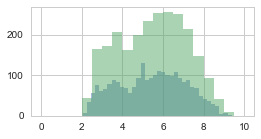

In [8]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5)

bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))

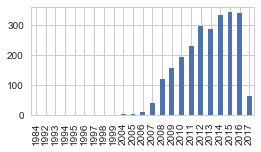

In [9]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

# 2. General Movies

In [10]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.094238,0.155080,0.371342,0.262707,0.116642,6.304296,70585.649165,2012.280032,6.197295,1.768924,1.933285
std,0.146015,0.114166,0.133241,0.149813,0.115234,1.330227,85056.998823,3.104013,1.802129,0.237361,0.385161
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000,1984.000000,2.000000,1.206715,1.303840
25%,0.010000,0.050000,0.274000,0.130000,0.039000,5.400000,14376.000000,2010.000000,6.000000,1.605491,1.697056
50%,0.029000,0.131000,0.394000,0.255000,0.074000,6.400000,38478.000000,2013.000000,6.000000,1.735972,1.851486
75%,0.101000,0.249000,0.482000,0.402000,0.153000,7.300000,93021.000000,2015.000000,8.000000,1.892300,2.042547
max,0.942000,0.424000,0.619000,0.582000,0.676000,9.200000,709045.000000,2017.000000,10.000000,3.397793,5.154028


## 2.1 Overview

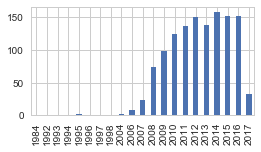

In [11]:
df['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(4,2))

In [12]:
df['std'].hist(bins=20, alpha=0.5, figsize=(4,2))
plt_configure(title='STD distribution')

plt.figure()
bins=arange(0,10.5,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(title='Rating distribution')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQsAAACZCAYAAAA4jB+uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEWBJREFUeJzt3XlM0+cfB/B3AavY4pCdIlZFQYegdjU43E8Rj9WpzBsD
DjdNNDIVEeMEAY9IRGW6IV7DM4EYx7ymbs6IEpk6cOu8pmE6shAR4sBjo9VRle/vD2NHBcpTLLTK
+5WY2O/zPT59hLfP8z1amSRJEoiIGuBk7wKI6MXAsCAiIQwLIhLCsCAiIQwLIhLCsCAiIQyLZvDo
0SNkZGRAq9XC398fQUFBiI2NRXFxMQCgpKQEPXr0sPgHAOLi4syW+fv7Y8iQIUhNTcWDBw+sqik6
OhpxcXEAgP3796N///5C2xUWFiI/P7/e9oKCAvTo0QMGgwEA0KNHD+Tm5lpVW00lJSXIyckxvR4y
ZAiysrIavT9qPBd7F9ASrFu3Djk5OUhISEC3bt1w584dbNy4EVOmTMH333+PDh064PTp06b1k5KS
0KZNGyQkJNTaV0hICFasWAEA+Pfff1FYWIiUlBRcu3YNGRkZkMlkVtc3cuRIBAcHC6376aefYvr0
6Xj33XfrbFer1Th9+jTatm1rdR11iY+Ph7+/P4YNGwYA2Lt3L1xdXW2yb7IOw6IZ7Nu3D4sXLzb9
Qnp5eeHLL7/EgAEDkJOTg/Hjx+P11183rS+Xy9GmTRuzZTXbai7v1KkTOnXqhHHjxuHkyZMYOnSo
1fW1adMGbdq0acQ7q+3Z+mzNw8OjyfZNlnEa0gxkMhny8/Px6NEj0zJXV1ccPHgQw4cPf+799+zZ
ExqNBseOHat3nafH6tOnD+Lj42E0Gk1tz05DNm7ciODgYAQEBGDs2LE4deoUACAyMhI3b97EihUr
EBkZaZo+bdq0CYGBgZgxY0ataQgAXLp0CaGhoQgICEBkZCSKiopMbc9OU2puHxcXh3PnzmHHjh0Y
MmQIAPNpiCRJyMrKglarRUBAAMaMGWOqFXgybVu2bBni4uKgVqsRFBSEjRs3NrabWzyGRTOYPn06
9u/fj+DgYMTFxeHAgQOoqKhA586d4ebmZpNj+Pj44I8//qizLT8/HwkJCZg2bRoOHDgANze3es8j
5OTkYPv27UhJScHRo0cRHByMmJgY6PV6pKen46233kJsbCzS09NN2+Tl5SE7OxufffZZnfvMzMzE
7NmzsX//figUCsyZMwfV1dUNvqeEhASo1WqEh4dj7969tdozMjKQlpaG6OhoHDp0CMOGDUNUVBQK
CwtN6+zduxeenp749ttvMW3aNKxfvx5Xr15t8NhUG8OiGcycORPr16+Hj48Pjhw5gri4OAwaNAgr
VqzA48ePbXKMdu3aQa/X19m2Z88eDB06FBEREfD29kZ8fDy8vb3rXLekpAStWrWCp6cnvLy8MHv2
bKSnp8PFxQXu7u5wdnaGQqGAu7u7aZupU6eiS5cu8PHxqXOfM2bMwIgRI+Dj44OVK1fixo0bFk+S
PuXm5oZWrVrB1dW11vRDkiTs3LkTs2bNwqhRo9C1a1fMnTsXAwYMwNatW03rqVQqREdHQ6VSYebM
mXB3d8fly5cbPDbVxrBoJlqtFrt27UJBQQG2bNmC4cOHIysrC9u3b7fJ/g0GA5RKZZ1t169fR69e
vUyvZTIZAgIC6lw3NDQU7du3h1arxbhx47B582Z06dLF4jkNLy8vi7X16dPH9HcPDw907NgR165d
s7hNQ+7cuYO7d++ib9++Zss1Go3ZCEulUpm1KxQKs+kgiWNYNLHCwkLT1QvgyQ9rSEgI0tLSMHLk
SPz44482Oc7Vq1fRs2fPOttkMhmefbi4VatWda776quv4rvvvsPOnTsRGBiIw4cPY+zYsWZD+2c1
dHLU2dnZ7HV1dXW9xxcdabVu3brO5dXV1WZTHLlcXmsdPmjdOAyLJlZdXY2srCycO3euVptSqUT7
9u2f+xjXr1/Hr7/+ig8++KDOdl9fX1y8eNFsWX3z9lOnTiEzMxMDBgxAfHw8fvjhB7i5uSEvL6/R
9dUMmlu3bqG0tBTdu3cH8CS0ap4MvXHjhtA+lUol3njjDZw/f95s+fnz5+udYtHz4aXTJubn54f3
338f8+bNQ2xsLPr37w+DwYCzZ8/i8OHD2Llzp1X7MxqNKC8vBwBUVVXh6tWrSE1NRUhICAYOHFjn
NlOnTsWUKVOwc+dODB48GAcPHkRhYaHpZq+aJEnC2rVr8dprr0GtVuPixYsoLy83TVsUCgWKiopw
+/Zt4Zo3bNgAT09PdOzYESkpKejVq5fp6ktAQAB2796Nt99+G3/99Rd27Nhhtq1CoUBxcTFu3bqF
N99806zt6bkgT09P+Pn54ciRIzhz5gwyMzOFayNxDItmsHbtWmzbtg27du1CcnIynJyc0KdPH2zb
tg1qtdqqfeXm5uJ///sfAKBt27bo2LEjJk2ahE8++aTebfr27Yu0tDSsXbsWX3zxBQYNGoRRo0bV
ue7gwYOxaNEipKWloaysDB06dEBSUhKCgoIAPAmeVatW4fz589iwYYNQzVFRUVizZg3KysoQFBSE
NWvWmNqWLFmCpKQkjBkzBt27d8eCBQswd+5cU3t4eDgWLVqEDz/8ED/99JPZfj/66CPcv38fa9as
we3bt+Hr64stW7agX79+QnWRdWT8pCwiEsFzFkQkhGFBRELses5Cp9PZ8/BELZpGo7Fqfbuf4LS2
4Kam0+kcriZRL2rtrLv5NeY/ak5DiEgIw4KIhDAsiEiI3c9ZOLrdx+p/JqKmCG3dz2UQvSw4siAi
IQwLIhLCsCAiIQwLIhLCsCAiIQwLIhLCS6c2wkus9LLjyIKIhDAsiEgIw4KIhDAsiEgIw4KIhDAs
iEgIw4KIhPA+i2bG+zHoRcWRBREJYVgQkRCGBREJYVgQkRCGBREJYVgQkRCGBREJYVgQkRCLN2U9
fPgQixcvxs2bN2E0GhEVFYXu3bsjLi4OMpkMPj4+WLp0KZycnJCdnY09e/bAxcUFUVFRCAkJaa73
QETNwGJYHDp0CO7u7khNTcW9e/cwduxY9OzZEzExMejfvz+WLFmCEydOoG/fvsjMzMS+fftQVVWF
iIgIvPfee5DL5c31PoioiVkMixEjRkCr1QIAJEmCs7Mzrly5gsDAQADAoEGDcObMGTg5OUGtVkMu
l0Mul0OlUqGwsBC9e/du+ndARM3CYlgoFAoAgF6vR3R0NGJiYrB69WrIZDJTe2VlJfR6Pdzc3My2
0+v1QgU05qvfm1rNmkpL/7ZTDYZGbud4/SmCdTu+Bh8kKysrw+zZsxEREYHQ0FCkpqaa2gwGA9q1
awelUgmDwWC2vGZ4WKLRaBpRdtPR6XRmNf1eIfbgl61pNNY/SPZs7S8K1t38GhNyFq+GVFRUYPr0
6Vi4cCEmTpwIAPDz80NBQQEAIC8vD/369UPv3r2h0+lQVVWFyspKFBUVwdfXtxFvgYgclcWRxZYt
W/DPP/9g06ZN2LRpEwAgISEBycnJWLduHby9vaHVauHs7IzIyEhERERAkiTMnz8frVu3bpY3QETN
w2JYJCYmIjExsdbyrKysWsvCwsIQFhZmu8qIyKHwpiwiEsKwICIhDAsiEsKwICIhDAsiEsKwICIh
DAsiEsKwICIhDAsiEsKwICIhDAsiEsKwICIh/GJkB8UvUCZHw5EFEQlhWBCREIYFEQlhWBCREIYF
EQlhWBCREIYFEQlhWBCREIYFEQlhWBCREIYFEQlpsc+G1PfsRWnp33b7flMiR8aRBREJYVgQkRCG
BREJYVgQkRCGBREJEQqLixcvIjIyEgBQXFyM8PBwREREYOnSpaiurgYAZGdnY/z48QgLC0Nubm7T
VUxEdtFgWGz

## 2.2 standard deviation

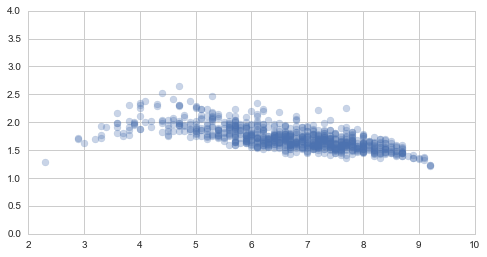

In [47]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,0,4])
plt.gca().set_aspect('equal')
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, './all.html', show_ratings_num=False, click=True, show_distribution=True)

In [14]:
movie_list(df.sort_values(by='std',ascending=False))

## 2.3 Ratings Number Comparison (Converge)

In [15]:
for num in [0, 5000, 20000, 50000, 100000, 200000]:
    sub_df = df.query("db_ratings_count > @num")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title = num, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAHz5JREFUeJztnWmQZFW17397nyGnmoeeJ7qbduCpKNiEBgiKT9AIwyF4
im1gGH5RJELxehUlFL1eQ8Xp3qsRiOAHXyCOISrv6dOnXq7KxYvYIQi8lrabHqi5KisrxzPv/T6c
qqK6uzqruruGrGb/IjqiKytz18rM/T977bX2WkdorTUGg2Fe5GobYDC0MkYgBkMTjEAMhiYYgRgM
TTACMRiaYARiMDTBCKRFiKKIz3zmM1x22WVcdtllfPGLXyRJktU26zmPvdoGGFK++tWv8uCDD/LN
b36TRqPBRz/6Udra2nj/+9+/2qY9pxEmUbj6BEHAZZddxle+8hWuvvpqAH7yk5/wpS99iQcffBAp
zUK/WphPvgU4cOAAnuexd+/e2ccuvfRSisUix48fX0XLDEYgLcDo6Ci5XI729vbZx/r7+wEYGRlZ
LbMMGIG0BJ7nkclkTnjMdV0AwjBcDZMM0xiBtADZbPYUIcz8nMvlVsMkwzRGIC3Ahg0baDQa1Gq1
2cfGx8cBWL9+/WqZZcAIpCV4/vOfTy6XY//+/bOP/fnPf6avr49t27atomUGI5AWIJvNct111/GZ
z3yG/fv388c//pGvfOUrvOtd71pt057zmDxIixAEAZ/97Gf5xS9+geu6vOUtb+Ef//EfTQ5klTEC
MRiaYC5PBkMTjEAMhiYYgRgMTTACMRiaYARiMDTBCMRgaIIRiMHQBCMQg6EJRiAGQxOMQAyGJhiB
GAxNMAIxGJpgBGIwNMEIxGBoghGIwdAEIxCDoQlGIAZDE4xADIYmGIEYDE0wAjEYmmAEYjA0wQjE
YGiCEYjB0AQjEIOhCUYgBkMTjEAMhiYYgRgMTTACMRiaYARiMDRhUQIpFotceeWVHD58eLntMRha
igUFEkURt912G9lsdiXsMRhaigUFcvvtt3P99dezbt26lbDHYGgp7Ga/vO++++jp6eGKK67grrvu
WtSAc++zZzC0GpdccskZPb/pHabe+c53IoRACMGBAwfYsWMH3/jGN2Zvcj8f+/fvP2MjVgNj59Kx
FmyEs7Oz6Qpy7733zv7/hhtu4NOf/nRTcRgM5xsmzGswNKHpCjKXe+65ZzntMBhaErOCGAxNMAIx
GJpgBGIwNMEIxGBoghHIEpEojR/EJOq0aSXDGmTRUSzD/GitOTw4xXjJI040tiXo786xa3MXQojV
Ns9wjpgV5Bw5PDjFRMnHkpKMY2FJyUTJ5/Dg1GqbZlgCjEDOgURpxkseUp64UkgpGC95xt06DzAC
OQeiKCFO5hdBnGiiKFlhiwxLjRHIOeA4FrY1/z7DtgSOY62wRYalxgjkHLBkuiFXJ7lSSmn6u3NY
0mzS1zpGIOfIrs1d9HVnSZQiiBISpejrzrJrc9dqm2ZYAkyY9xwRQrB7SzcXbOoiihIcxzIrx3nE
ggJJkoRPfOITHDlyBCEE//RP/8SePXtWwrZlI1GaMFYkSi/ZZLakwMqY6835xoIu1gMPPADA97//
fW6++Wb+5V/+ZdmNWi601hwaKPGnJ4c5OOjzpyeHOTRQoklRZUthsvUrz4KXvNe+9rVcddVVAAwN
DdHR0bHcNi0bc5N6jiVmk3owxe4t3StqS6L0ol0yk61fPZrWpM/llltu4de//jVf+9rXuPzyy0/7
vFZt2qCU5qlBn/nmotLwvM3ZUxJ+y4HWmuHJiHIjmXXxOvMWG3uc0072oWJIuREj5/xeaU1n3mZT
r7vsNp9PLGnThpMZHx/nbW97Gz//+c/J5/PzPqdVC/j9IOaRA6NkpnMThw4dYvfu3QAEUcLLX7Ae
x7HmvaqfydV+IQ4NlJgo+SeIUSlNX3d23lXskUf+TJzdhCVP9YYTpdh70cZVDwq06nd+MkvetAHg
pz/9KaOjo7z3ve8ll8shhEDO82W1Oo5jIQWEUYJtnWi/LeH4aIVi2SdONFJCVyHLnu1dHBupLJlr
M3M05eTJPnM05YJNXadM9lhp4kRjzfORz2TrTXBg+Vjwk33d617Hxz/+cd75zncSxzG33nrrmuuy
qLXmyNAUo6UGU5UA25KUqxG7tEZr8KOEyXKAFIJiuUGlHhLHJf7zr4P0defY3NdGxpEopRkaq6OU
Zs+2njO2Y+ZoyplMdlsKMNn6VWNBgeTzef7t3/5tJWxZNmY255v72pBCUKmHVL2EwfEaF+3qRU0p
pBQMTdSo1EOkENi2ZLRYJ+PYDFFDCEmlFpAozeHBEn6U8MIdvaesRs04m6MpcjpbP59bZrL1y895
szbP7BOkJVGJmt0vnOzWbOprY32vhqDI+t48W/rbGZv0EFJTrgVoDch0AsaJRmvN8eEqXR0ZpBBU
6wGVeogXDHLwWImL9/QvyuWasa+3M5uuVmcw2dOs/PxRLMPysuYFMhMCHZtsMDhep+6FFHIOW/rb
6O/Js7mv7RS3xhICWwqUAgRYEgZHqzwzWkMKEAIytoUUGiGh0kjHrDVCxkoNwlghpGCqFiBEasOF
W+d3uU4J0crUpcs4FoliUZN9rWXrlzKosdqseYHMuE9jJR8viJFSUq1HDFsNhEj3Dc3cmqxrE0QJ
VS/CklD3Y8IwIVYKW0rigTLlRkDdjxibbKA1FHI2fhCTy9iUqyGPHy6yc3P3vJPh4DMlRicaOK5F
xklVmhOS7s4M29d3nNEkavVs/fmYr2ndT3sRzLhPAkG55lOuhTT8CKVgZLKOALRW9HTlKJ3s1ujU
rQHIOhbd7RmOj1bw/AjLkhSyDolSeFGMFyQkGuJE4VgSIQRBlKA02LakVAnww5hC1pkdP04UB56e
5JEDwyQKXEfS2ZZhY28BKQWTZZ/dW+YX1VplbiJ2ZsVerUTsUrGmBTITFRJoimWfMEoQQmBZkCRQ
qgTEieLiPeuwpGC02MAPE7KuRWfeZsfGTqr1gDDWbOgpMLXeZzLv4gcJWmkmyg3aCi5SgJ4+3iGE
IIrTMQRpkjFRyeyR95mr6GMHxzk8UGZ4skbGtukouExVArTWbO5vP+9CtGcTwl4LrOlvZyYqpDQE
YXxCfkbK9Opea4SESXowken9RZxonpkIeOixQbQQHBmaopDLoJSmpz0L7ZqJkkcQKiAijBVt03kU
P4yxlaS73SJRioGRCtmszaNPjdHTlcWWguJUwDOjVcq1AM9PaOiEuh/RWXDRaDb0tZ02ajWf/74W
fPqzCWGvBdaexXOYKVgaGquTce3ZFURrTS5jUyr7hEnC/b8/RBxrutpdJso+R4cqjE3UGJg6ys5N
3XR3OBwfLTNW8im4No0wQutUZI4tU5eo5uP56UFBHWhA09OeYV13jrZ8hoPPTFH/e0gYJGzb2MFI
sYHSGteWRIkiTtJ6kZFJj8CP2bKh7YTJPp//3teVZXAiIHxyuOV9+vO1unJNCwTSEGiiNN3tLqVq
SBDEZDI2Sql04y0ER4erOJbkb0dLWBaEsca2JFGsGCvVmKxaBGFMpebjWRZeFJN3bWxLorXGC+L0
FK3WqOmTOdVaiBSSDb2ag8eLlGshUZyK4JnRSronKWRxXQtCCCJFoiBJYro7M7NRq5nV4fhohcly
cIL//vjhIgNjARu2pI+da6LyXFhoFbPO03zNmheI0rB9fQf6RZqxSQ8pBH4Y8/ihcRxLknVtvCBG
A1O1gEQppJQEQUIiwjSrXq+xqbeNDb1tOJZgbMpHCPCCiLa8QxwnJFoTxxpBurJYlkQlCYcGJqk0
YkATRZo4UdQaNTSQq4ZkMzZZx6K9zaW7PUPWtWY3rIcGSoyXPMJY8fTAFO15lw19BdAgpKBSC6n7
CVGUMF72KVd

## 2.4 Time Shift

In [16]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
fig, ax = plt.subplots()
sub_df=df.query("db_ratings_count > 20000")
scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(figsize=(4,4))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAAD3CAYAAAAHbAHDAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvVmMXdd55/tba+3hjDUXi5NFS7LpSZ3QQ4L4xoZ9lU53
kHQAG5ItK0FswIIRBN1opJUeosAwFCOQHCSGM6Dt7gQIEujFTvTQiZ3AaCdWJxfGvbZFR44lS6JF
URyLNZ464x7XWvdh7XNYRRbJquIgkrV/LxLrnKra+9RZ3/nG/yestZaSkpKSLSJf7wsoKSm5vSiN
RklJybYojUZJScm2KI1GSUnJtiiNRklJybbwXu8LGHL06NHX+xJKSnYt7373u7f83FvGaMD2Lvx2
4+jRozf0/rSxfOeFeZS81HnUxvCT79iHkuKG/O4bfW+vN7vh/rZDGZ7cIWSZJtebt9zk2pJl+iZf
UcmdSmk07hB8X+GpzT0JTwl8X93kKyq5UymNxh2CkoLZySrGbPQ2jLHMTlZvWGhSsvsojcYdxL0H
JpiZrKCNIck02hhmJivce2Di9b60kjuIWyoRWnJtCCF408FJ7t4/QZZpfF+VHkbJdac0GncgSgpU
WP5pS24MZXhSUlKyLUqjUVJSsi1Ko1FSUrItSqNRUlKyLUqjUVJSsi1Ko1FSUrItrlqX01rz6U9/
mhMnTiCE4Ld/+7c5fPjw6PGvfe1r/MVf/AVKKQ4fPszjjz+OlJIPf/jDNBoNAA4ePMiTTz554+6i
pKTkpnFVo/HMM88A8OUvf5lvf/vbfOELX+BLX/oSAHEc8wd/8Ad89atfpVqt8uijj/LMM8/wvve9
D2stTz311I29+pKSkpvOVY3Gv/7X/5oPfvCDAJw7d46xsbHRY0EQ8OUvf5lqtQpAnueEYchLL71E
FEV88pOfJM9zHn30UY4cOXJj7qCkpOSmIra6wuC//bf/xje+8Q3+6I/+iPe9732XPP7UU0/xj//4
j/zpn/4px44d4/vf/z4f+chHeO211/jUpz7F17/+dTzv8jaqFOEpKXn92JZeiN0Gi4uL9oMf/KDt
9/ujr2mt7ec+9zn7q7/6q3YwGFhrrU2SxEZRNHrOAw88YM+dO3fFn/3ss89u51JuO+7k+7uT783a
8v4u5qrVk//1v/4X//N//k8AqtUqQgjkOnWoz3zmMyRJwhe/+MVRmPL000/zuc99DoCFhQV6vR6z
s7PbMXwlJSW3KFfNafybf/NveOyxx/jlX/5l8jznt37rt/jGN77BYDDgvvvu4+mnn+Y973kPn/jE
JwD4+Mc/zoMPPshjjz3Gww8/jBCCJ5544oqhSUlJye3DVU9yrVbjD//wDy/7+EsvvbTp1z//+c/v
/KpKSkpuWcrmrpKSkm1RGo2SkpJtURqNkpKSbVEajZKSkm1RGo2SkpJtURqNkpKSbVEajZKSkm1R
Go2SkpJtURqNkpKSbVEajZKSkm1RGo2SkpJtURqNkpKSbVEajZKSkm1RGo2SkpJtURqNkpKSbVEa
jZKSkm1xVaOhteaxxx7jYx/7GA8//DDHjh3b8Pg3v/lNHnjgAR566CH+8i//EgBjDJ/5zGd46KGH
+JVf+RVOnjx5Y66+pKTkpnNVo7F+78mv//qv84UvfGH0WJZlPPnkk/zZn/0ZTz31FF/5yldYXl7m
7//+70nTlK985Sv8xm/8xkgvtKSk5PbnmvaeHD9+nLvuuovx8XHAyaB/97vf5bnnnuP9738/AEeO
HOH555+/AZdeUlLyerAltV/P8zbsPRnS6/VoNpujf9frdXq9Hr1eb7SSEUApRZ7nVxUXvtN3n9zJ
93cn3xvc+fe3HbYsEf67v/u7/Of//J/56Ec/yt/+7d9Sq9VoNBr0+/3Rc/r9Ps1m85KvG2O2pEa+
rYUttxHaWL7z3Wf5yZ94D0qK1/tyrjtHjx69Y/92sDvubztc096Te++9l5MnT7K2tkaapjz77LO8
853v5F3vehf/9E//BMBzzz23YWH0bsJayytnWnznhXmOnY35zgvzvHKmhd3aUruSkluSa9p78tBD
D/Gbv/mbPPLII1hreeCBB5ibm+Nnf/Zn+da3vsXHPvYxrLU88cQTN+NebjmOn11juRWjpMRXAiUl
y60YWONNBydf78u7oWhjyTKN76s70rvazVzz3pP777+f+++/f8PXpJR89rOfvfaru43RxrLUilBy
ozMnpWCpFXH3/ok78jBZazl+do2lVkSuLZ4SzE5WuffABELcefe7Gymbu24QWabJ9eZhSK7dp/Cd
yHrvKvTVyLs6fnbt9b60kutEaTRuEL6v8NTmn6yeEvi+uslXdOMZelfyIg9q6F1pU+Zy7gRKo3GD
UNK55eaig2KMZXayekeGJrvVu9ptlEbjBnLvgQlmJitoY8i0RRvDzGSFew9MvN6XdkPYjd7VbqRc
5X4DEULwpoOT3L1/AgZn+cl37LsjPYwhQ+9quRVvCFHuZO9qN1J6GjcBJQWBJ2+bQ6ONJU7yHeUg
1ntXSabveO9qN1J6GiUjrke5dL13VfZp3JmURqNkxPpyqSp80J02oykpUGH59roTKcOTEqAsl5Zs
ndJolABlubRk65RGowQoy6UlW6c0GiXA7mxGK9kZpdEoGVGWS0u2Qpnevg24WWPmZbm0ZCuURuMW
5vUaMy/LpSVXogxPbgEu14FZjpmX3IqUHyevI1fyJIxlV4r4lNz6XNFoZFnGb/3Wb3H27FnSNOXX
fu3X+Jmf+RkAlpaWePTRR0fPffHFF/mN3/gNHn74YT784Q+P1MgPHjzIk08+eQNv4fblSh2YB2eb
5NqOvr6eYd9EGUKUvB5c8V33N3/zN0xMTPB7v/d7rK2t8aEPfWhkNGZnZ3nqqacA+Od//me+8IUv
8NGPfpQkSbDWjh4r2ZyryQHetXe87JsouSUR9grS2P1+H2stjUaDVqvFgw8+yD/8wz9seM5QUPj3
f//3ueeee/j+97/Pf/2v/5UDBw6Q5zmPPvooR44cueqF3Gl7JYyx5MbiSXFJazZAmhuOnY3xNzEM
mbYcPlBhuZ3THuTIdUlPYy3jNY/908ENvf6S3cV2VjRc0dOo1+uAW4r0H//jf+TXf/3XL3nON7/5
Td785jdzzz33AFCpVHjkkUf4yEc+wmuvvcanPvUpvv71r++avScX5yko8hRr54/znve8Z/Q8bSzU
5i/xNNxjhp98xz6k4LYQ6d0Ne0Hu9PvbDlc9yfPz8/z7f//v+aVf+iV+8Rd/8ZLH/+Zv/oaPf/zj
o3/ffffdHDp0CCEEd999NxMTEywtLbFv375tXdjtyuXyFEur2YbnXU6wJtOGiXoIlH0TJbcmVyy5
Li8v88lPfpL/8l/+Cw8++OCmz3n++ed517veNfr3008/PVr4vLCwQK/XY3Z29jpe8q3LlSZF2wN9
SUl1YwdmzpmlLgsrfVY60YbFSkoKKqFXGoySW4Irehr/43/8DzqdDl/84hf54he/CMBHPvIRoiji
oYceYnV1lUajscFVfvDBB3nsscd4+OGHEULwxBNPbCk0uRMYTopuVvEYdnWur3is9yReOrmCEhLP
u/DNu2WxUsntxRVP86c//Wk+/elPX/bxqakp/vqv/3rD14Ig4POf//z1ubrbjCtNiip55YpHp5du
MBhQ9mSU3JqUHaHXkStNio7XLp+P2I6WxbXod5aUXA92R9xwE3EToZdWPLzEv+z3bEXLolx3WHKr
UBqN68zlKh5HFy5/sLci/f/KmdZ10+8sKbkWyvDkBrHdiseVtCxK/c6SW4nS07hFuFJPRpbm5RxK
yS1D+U67xdhMy6LU7yy5lSjDk9uAy1Vl8tww1ihnUEpuLqWnsQ1uluzeZqyvymS5YXktAgHaGr7z
wnxZSSm5aZR

In [17]:
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.3)
    ax.axis([2,10,0,4])
    plt.gca().set_aspect('equal')
    plt_configure(title=year, figsize=(3,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAACeCAYAAAB3j0V0AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF5VJREFUeJzt3XmMVfXdx/H37yx3m7mzwQADCiKV0u3RR6xocKG1rbaJ
aTCkRQxN4z+tNbE0SqiUUltsXf7QqpEi+IcGtbZNTYtNY6ON6SKJFatWKNVHUGSGGWa7s9z1LL/f
88dlpgMM5wLOcmG+r8SEueecO98zns/5Lefce5QxxiCEGJU12QUIUc0kIEJEkIAIEUECIkQECYgQ
ESQgQkSQgIyTjo4ObrvtNpYsWcLSpUu588476e/vB8D3fX7yk5+wZMkSlixZwv33308YhsPbVlqe
zWZZv349l112GZdddhnr1q0jk8lM+D5OCUaMuSAIzPLly83NN99s9u7da9566y2zfPly861vfcsY
Y8y9995rvvjFL5o33njDvPLKK2bp0qXm0UcfHd6+0vI77rjDrFixwuzZs8fs3r3bLF++3HznO9+Z
8P2cCiQg4+Dtt982CxcuNJ2dncOv7dq1a/i1Cy+80Lz00kvDy5577jlz+eWXmzAMTbFYjFxujDEX
X3yxef7554eX79ixw1x00UUTsGdTj3SxxsGcOXPYtm0bzc3Nw68ppQBoa2ujUChw6aWXDi+75JJL
6Onp4cMPP2Tv3r2RywEaGxt5/vnnGRwcJJvN8oc//IFPf/rTE7R3U4sEZBw0NjZy1VVXHfXaE088
wbx58zh8+DDJZJJ0Oj28bChIHR0dFZcDbNq0iT179vDZz36WSy65hP379/PAAw+M925NSRKQCbB1
61ZefPFFfvCDH1AoFIjH40ctj8ViAHieV3E5wP79+5k/fz5PPvkkTz75JOl0mrVr12Lktrox50x2
AWe7Rx99lIcffpiNGzdy9dVX88ILLwwf6EOGfk4mkyQSicjlH374IXfffTcvvPAC8+bNA+CRRx7h
mmuu4R//+AdLliyZgL2aOqQFGUc//elPeeSRR7jrrru46aabAJg1axb5fJ5sNju8XldXFwAzZ86s
uHz37t0kEonhcEB5zNPY2MjBgwcnYremFAnIOHnooYd46qmnuOeee7jxxhuHX1+0aBHJZJLXX399
+LVdu3Yxffp05s6dW3H5zJkzyefztLa2Di/v7u6mr6+PuXPnTszOTSWTPY12NtqzZ49ZtGiRuf/+
+01nZ+dR//m+bzZt2mQ+//nPm127dpmdO3eapUuXmi1btgxvH7U8CAJzww03mJUrV5q3337b7Nmz
x6xevdqsWLFieBpYjB1ljIzsxtqDDz7Ili1bRl32/PPPM2/ePO6++27++Mc/EovFWL58OXfccQeW
VW7QS6VS5PLu7m7uvfdedu7ciTGGpUuXsn79epqamiZsH6cKCYgQEWQMIkQECYgQESQgQkSQgAgR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRAQJ
iBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRQQIiRISTCkhPTw9X
X301+/btG+96hKgqFQPi+z4bN24kkUhMRD1CVJWKAbnvvvtYuXIlM2bMmIh6hKgqkU+5fe6552hq
auLKK69k69atJ/WGI5+tJ0S1Wbx48SmtH/mEqZtuugmlFEop9u7dy3nnnccvfvGL4Qfbj+b1118/
5SImg9Q5ds6EGuH06oxsQZ5++unhf69evZq77rorMhxCnG1kmleICJEtyEjbt28fzzqEqErSgggR
QQIiRAQJiBARJCBCRJCACBFBAiJEBAmIEBEkIEJEkIAIEUECIkQECYgQESQgQkSQgAgRoeLdvGEY
smHDBt5//32UUvz4xz9m4cKFE1GbEJOuYgvy8ssvA/Dss8+yZs0aHnzwwXEvSohqUbEF+cIXvsCy
ZcsAOHToEHV1deNdkxBVI/Iz6SOtW7eOF198kYcffpgrrrjihOvJlzaIanbKn503p6Czs9MsW7bM
5HK5E66za9euU3nLSSN1jp0zoUZjTq/OimOQ3/3udzz22GMAJJNJlFJYlkx+iamh4hjkS1/6Enfe
eSc33XQTQRCwfv16+ZZFMWVUDEgqleKhhx6aiFqEqDrSVxIiggREiAgSECEiSECEiCABESKCBESI
CBIQISJIQISIMCUDEmqDF2hCfVL3aYop7KQff3A2MMawr62PrkyBd9uKkGqnuTHJgjkNKKUmuzxR
haZUC7KvrY/uTBHbsnBthW1ZdGeK7Gvrm+zSRJWaMgEJtaErU8Cyjm4pLEvRlSlMue5WqA3FUjDl
9vtUTZkulu+HBKHBHuWUEIQG3w+x49X55wh1uT7XtbGtj9YVHNnNDEKDYyvpZkaIPCJ832f9+vW0
tbXheR633HIL11xzzUTVNqZc18axRz8AHFvhuvYEV1SZMYZDPR7envYxO5hHdjOHThbdmSLQx8fO
aRy74s8SkV2sHTt20NDQwDPPPMPjjz/Opk2bJqquMWdb5YNLH9Ol0NrQ3Jg8pTNzVPdkaJkX6I/c
hdnX1kd/PsC2LOKu/ZHHTNLNPHWRLch1113HtddeC5TPZrZdfWfZU7FgTgNQ7l74oSHUeviMfDKC
UPPOBxn6ckW05qgzOpQP6I6eHAc7Bil6IbUpl3Oaa2luSp3yWX/4YFajH8zzZzeccncrqpvp+ZrB
XIl0Tfwjd+POJif1pQ3ZbJZbbrmFr33ta1x//fWR654JX9qgtSHQBsdSx51NR2OMob3X5/3DRbLF
ENuyqIlbNKZtjIH6lIMxhgOdJTr6PAoljWUpYo5iVoNLU51Lfcph9rTYSdfoBZp324q4o3QL/dCw
cE6CmHNqcyxaG95pK2Ip0MagNShl6MuF5IqaWQ0ujmNRn7JpaXJHDfSp/u2qzal+aUPFUWl7ezu3
3norq1atqhiO0y1iooXa8I/XdnHx4sWRZ8uhwfGHhwfw3CIZv48mS6GNIQg0qbo4c5rT+GHIoe4s
oZOlpLN4OiQIQqzAwgy6nDO3hcaGBIsWzcR1bHSoTzjg9gJNvuARj7sEsXb+7739LFr4MRzHKh+c
oUYpuPQzs0/rTN8wq5e33+slm/cItWEgW0LbsOiCNLOnp4FyCBoaE0eNSY4d3DOi9fznP/9Z9f/P
4fRO3pEB6e7u5uabb2bjxo1cfvnlp11YtTjZC4Uj1/MCzfttfdQk4wShJpv1yRd9tIaO3hwGqEvF
2N/aTxAaCl553KGUIgw0fYMl9rdl2N+qOHg4S8kPqEnGmNNcw4wRXS+tNX95o5UD7QOU/JCOnjy5
go9fyNI+cADHdpjZlEQD9bUx/vN+Lx8/rxFnRH/ppGe7lAFV3s98ySeZcIcXDYWwvStHy/RaEjEH
21KRg/uzWWRAtmzZwsDAAJs3b2bz5s0AbNu27Yz90oYTXSg8dgbnqINBGYxR5IserZ1ZYq6FUgrb
hjCEvoESpVJIySsfmGFg8ENNGGoM5b59V6aAbSmm1SdxHZtCKaAzU8RSFn7QS8u0Gl77dweHunM4
ts3BzizZvIc2hsGixuvJU/QC2ntjzJlRi6UMr/yrjf8c6OHChc2cP7ue/Yf6Tzh1OxQcy7bo7ity
TnOa0BgKBR+jIO7Y9Gc9tMkykC3SlSlQ8AJaOweZ11LHtIYkPX0FnGPGoEPjIafC4H4sp6knWmRA
NmzYwIYNGyaqlnE1NOi1j/nKomMHvceuZzsW9pFxQNHzcZ3YcGtjWZSXKUMy4eD5mlDrI90gBabc
HfJ9TckYhg4NSyn6Bwt09ebozORpqk/x3sFeGtJx5jTX0DdYDmepFJIvhliuxrFs+nMedGbpGyxR
k4jRnSngBYb

# 3. Popular Moives

In [18]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,year,mode,std,std2
count,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000
mean,0.063438,0.127697,0.366874,0.302152,0.139844,6.654479,102771.042945,2012.257669,6.635583,1.724079,1.867110
std,0.112320,0.107084,0.130766,0.143930,0.126706,1.236346,90568.856467,3.179690,1.639039,0.205362,0.301628
min,0.001000,0.003000,0.021000,0.004000,0.009000,2.300000,20249.000000,1992.000000,2.000000,1.206715,1.320606
25%,0.007000,0.035500,0.267000,0.179000,0.049500,5.900000,40657.500000,2010.000000,6.000000,1.579179,1.666733
50%,0.019000,0.090000,0.385000,0.320000,0.094000,6.800000,71404.000000,2012.000000,6.000000,1.691863,1.815489
75%,0.065000,0.210500,0.475000,0.429000,0.188000,7.600000,133963.000000,2015.000000,8.000000,1.839408,1.979393
max,0.929000,0.400000,0.595000,0.569000,0.676000,9.200000,709045.000000,2017.000000,10.000000,2.651356,3.793152


In [19]:
movie_list(df.query("db_ratings_count > 100000").sample(frac=0.03).sort_values(by='db_rating',ascending=False), len=8)

In [20]:
df['std'].hist(alpha=0.5, figsize=(4,2))
plt_configure(xlabel='STD', ylabel='Frequency')
plt.figure()
bins=arange(0,10,0.5)
df['db_rating'].hist(bins=bins, alpha=0.5, figsize=(4,2))
plt.gca().set_xlim([2, 10])
plt_configure(xlabel='Rating', ylabel='Frequency')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARMAAACZCAYAAAAM9d6yAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEPVJREFUeJzt3WtMU3cDBvCnBQpK8bLhjAo4UZAZ41SmaBSdwoLXoIJV
mgkJzg2icTBiUMdQNqe+gU0XInOYLXMoU4Y6dXNoUAwGI9FueJv3TY2gRry3Ci3j/34wdlaxHOY5
tMXn96nntD19OBwezr0qIYQAEdELUjs6ABG1DSwTIpIFy4SIZMEyISJZsEyISBYsEyKShbujA/wX
BoPB0RGIXlqhoaFNjnfJMgGe/wNJYTAYXuj9cnKmLIBz5WGWpjkyi71/5NzMISJZsEyISBYsEyKS
hcvuM2kryo7dxZna046OYVVTY5tHHxXiwDTkSrhmQkSyYJkQkSxYJkQkC5YJEcmCZUJEsmCZEJEs
WCZEJAuWCRHJgmVCRLJgmRCRLFgmRCQLlgkRyYJlQkSyUOSqYYvFgsWLF6O6uhpmsxnJycno06cP
Fi5cCJVKhaCgICxZsgRqtRpFRUXYtGkT3N3dkZycjDFjxigRiYgUpkiZ7NixA506dUJ2djbu3LmD
KVOmICQkBCkpKQgLC0NmZib27t2LgQMHoqCgAFu2bEF9fT30ej1GjBgBjUajRCwiUpAiZTJu3DhE
RUUBAIQQcHNzw8mTJzF06FAAwKhRo1BRUQG1Wo1BgwZBo9FAo9EgICAAp0+fxoABA5SIRUQKUmSf
ibe3N7RaLYxGI+bPn4+UlBQIIaBSqazP379/H0ajET4+PjbvMxqNSkQiIoUpdqe1q1evYu7cudDr
9Zg8eTKys7Otz5lMJnTo0AFarRYmk8lm/JPlYs+Lft2FM31dRk1NjaMj2Hgyj8FgsvNK5TnT74lZ
7FOkTGpra5GYmIjMzEwMHz4cANCvXz9UVlYiLCwM5eXlGDZsGAYMGIDVq1ejvr4eZrMZFy5cQHBw
sKTPaCtfdVF2bB+6d+/u6BhWNTU1NnlCQx1320Zn+j0xy7+f/TyKlMnatWtx79495OXlIS8vDwDw
8ccfY9myZfjyyy8RGBiIqKgouLm5YdasWdDr9RBCIDU1FZ6enkpEIiKFKVImGRkZyMjIeGb8hg0b
nhmn0+mg0+mUiEFErYgnrRGRLFgmRCQLlgkRyYJlQkSykFQmc+bMwW+//QaLxaJ0HiJyUZLK5P33
38eBAwcQFRWFrKwsHDt2TOlcRORiJB0aHjJkCIYMGYK6ujqUlJRg/vz50Gq1iI2NhV6v54V5RCT9
PJPKykps374dFRUVGDVqFCZMmICKigokJyfj22+/VTIjEbkASWUyZswY+Pn5ISYmBpmZmfDy8gIA
DB06FLGxsYoGJCLXIKlM1q9fD29vb7z66quoq6vDpUuX0LNnT7i5uWHbtm1KZyQiFyBpB+z+/fvx
3nvvAQBu3ryJpKQkbN68WdFgRORaJJVJUVERNm7cCADo0aMHtm7d2uR1NkT08pJUJhaLxeaIjYeH
h2KBiMg1SdpnEhkZiYSEBIwfPx4AsGfPHowdO1bRYETkWiSVyYIFC1BSUoLDhw/D3d0d8fHxiIyM
VDobEbkQyeeZ9O7dG76+vhBCAAAOHz6MIUOGKBaMiFyLpDLJyspCWVkZ/P39reNUKhV++OEHxYIR
kWuRVCYVFRUoKSmxnqxGRPQ0SUdz/P39rZs3RERNkbRm0rFjR0ycONH6hVmPrVixQrFgRORaJJVJ
eHg4wsPDlc5CRC5MUplMnToVV65cwfnz5zFy5EhcvXrVZmcsEZGkfSa7du1CcnIyPv/8c9y9excz
Z87E9u3blc5GRC5EUpmsW7cOP/74o/XK4W3btiE/P1/pbETkQiSViVqthlartQ6/9tprUKt5L2oi
+pekfSZBQUHYsGEDGhoacOrUKRQWFiIkxHHfQUutp3D3admnqY/istMWSVq9yMzMxPXr1+Hp6YnF
ixdDq9ViyZIlSmcjIhciac2kffv2SEtLQ1pamtJ5iMhFSSqTkJAQqFQqm3FdunRBeXm5IqGIyPVI
KpPTp//dbrZYLCgtLUVVVZVioYjI9bT4kIyHhwfGjx+PQ4cOKZGHiFyUpDWTn3/+2fpYCIFz587x
1o1EZENSmVRWVtoMd+7cGatWrVIkEBG5JkllwquDiag5kspk7NixzxzNAR5t8qhUKuzdu1f2YETk
WiSVyeTJk+Hh4QGdTgd3d3fs3LkTx48fR2pqqt33HT16FDk5OSgoKMClS5ewcOFCqFQqBAUFYcmS
JVCr1SgqKsKmTZvg7u6O5ORkjBkzRpYfjIhal6QyOXDgALZu3WodTkhIwLRp09CjR4/nvmfdunXY
sWMH2rVrB+DRplJKSgrCwsKQmZmJvXv3YuDAgSgoKMCWLVtQX18PvV6PESNG2NyAiYhcg+RDwwcP
HrQ+Lisrg7e3t93XBwQEIDc31zp88uRJDB06FAAwatQoHDx4EMeOHbPevc3HxwcBAQE257QQkeuQ
tGby6aefIj09HbW1tQCAwMBA/O9//7P7nqioKFy5csU6/Hj/CgB4e3vj/v37MBqN8PHxsb7G29sb
RqOxxT8EETmepDLp378/fv31V9y6dQuenp7NrpU05clbFphMJnTo0AFarRYmk8lm/JPlYo/BYGhx
BjnfL6eamhpHR7ChdB6DwdT8i6yvdZ7fE7PYJ6lMqqurkZGRgerqamzcuBHJyclYvnw5/Pz8JH9Q
v379UFlZibCwMJSXl2PYsGEYMGAAVq9ejfr6epjNZly4cAHBwcGSphcaGir5s59mMBhe6P1yKju2
D927d3d0DKuamhrF84SGSrsFgTP9npjl389+Hsm3IJg9ezbat28PX19fTJo0Cenp6S0KkZ6ejtzc
XMyYMQMWiwVRUVHo0qULZs2aBb1ej4SEBKSmpsLT07NF0yUi5yBpzeT27dsYOXIkcnJyoFKpoNPp
sHHjxmbf5+fnh6KiIgBAr169sGHDhmdeo9PpoNPpWhibiJyNpDUTLy8vXLt2zboD9ciRIzx8S0Q2
JK2ZLFq0CB988AEuX76M6Oho3L17F1999ZXS2YjIhUgqk5s3b6K4uBgXL17EP//8g8DAQK6ZEJEN
SZs52dnZ8PDwQFBQEEJCQlgkRPQMSWsm/v7+WLRoEd588014eXlZx0+ZMkWxYETkWuyWyfXr19G1
a1d07twZwKML957EMiGix+yWSVJSErZt24YVK1bgu+++Q2JiYmvlojZM6nfx1NTcxZna5l/L7+Fx
Dnb3mQghrI937typeBgicl12y+TJGyI9WSxERE+TtAMWQJN3WnsZKfF1mURtgd0yOXfuHCIiIgA8
2hn7+DFv10hET7NbJrt3726tHETk4uyWib3bMhIRPanF3+hHRNQUlgkRyYJlQkSyYJkQkSxYJkQk
C5YJEcmCZUJEsmCZEJEsWCZEJAuWCRHJgmVCRLJgmRCRLFgmRCQLlgkRyYJlQkSykHzbRiJnJfet
NHm3+/+GayZEJAuWCRHJgps5RE9parNJ6heCPc/LsOnENRMikgXLhIhkwTIhIlk4xT6TxsZGLF26
FGfOnIFGo8GyZcvQs2dPR8ciohZwijIpLS2F2WzG5s2bUVVVhZUrV+Lrr79+4ek+7/yDF92ZRkTP
cooyMRgMCA8PBwAMHDgQJ06ccHAiInnJeWJdTc1dhIbKNjnZOEWZGI1GaLVa67CbmxsaGhrg7u4U
8YicjjOe9esUf61arRYmk8k63NjY2GyRGAyGZqfb1/d54zsCMDX9ZCtzpiyAc+VhlqYpkUXK31Nz
nKJMBg8ejLKyMkyYMAFVVVUIDg62+/pQZ1zHI3rJqYQQwtEhHh/NOXv2LIQQWL58OXr37u3oWETU
Ak5RJkTk+nj

## 3.1 Standard for evaluating STD

2.2363385253596357


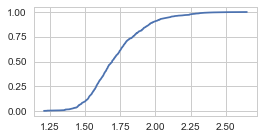

In [21]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(df['std'])
plt.plot(ecdf.x, ecdf.y)
plt_configure(figsize=(4,2))
std_standard = sp.optimize.brentq(lambda x: ecdf(x)-0.97 , 0, 4)
print(std_standard)

## 3.2 Scatter

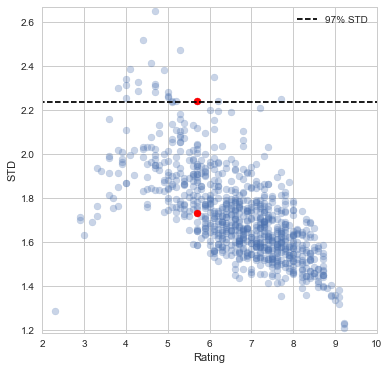

In [22]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3, label='')
plt.plot([0,10],[std_standard,std_standard], linestyle='--', color='black', label='97% STD')
sub_df = df[df['name'].str.contains("西游伏妖|杜拉拉升职记")] 
# sub_df = df[df['name'].str.contains("夏有乔木|爸爸去哪|刺客聂隐娘|一步之遥")] 
ax.scatter(sub_df.db_rating, sub_df['std'], color='red', label='') # s=80, 
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, '.\popular.html', show_ratings_num=False, click=True, show_distribution=True)

In [23]:
movie_list2(df[df['name'].str.contains("西游伏妖|夏有乔木|爸爸去哪|刺客聂隐娘")])
# movie_list2(df[df['name'].str.contains("杜拉拉升职记|苏乞儿|邻家特工|我11")])

## 3.3 Big deviation movies

In [25]:
movie_list(df.sort_values(by='std',ascending=False), len=30)

## 3.4 Timeshift

In [26]:
std_925 = sp.optimize.brentq(lambda x: ecdf(x)-0.925 , 0, 4)
for year in range(2008,2017):
    sub_df = df.query("year == @year")
    fig, ax = plt.subplots()
    scatter_plot = ax.scatter(sub_df.db_rating, sub_df['std'], alpha=0.4, label='')
    ax.axis([2,10,df['std'].min(),df['std'].max()])
    plt.plot([0,10],[std_925, std_925], linestyle='--', color='black', label='92.5% STD')
    sub_df_outliers = sub_df.query("std >= @std_925")
    ax.scatter(sub_df_outliers .db_rating, sub_df_outliers ['std'], alpha=0.5, color='red', label='')
    plt_configure(title=str(year)+ ': '+ str(len(sub_df_outliers))+'/'+str(len(sub_df)), 
                  xlabel='Rating', ylabel='STD', figsize=(2.5, 2.5), legend=True)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADGCAYAAACXUs/uAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXt0FeW5/z8zs6+5ESAk3CQENMVKKxcpcECwYAutbQEN
AlGiC1YPImqRq1iKKMilWqWAlILHIwaoVOpagD+LxwtKBQ8Kh1CDXDTINZALue7snb33zLy/PzYZ
CYGdgCQ7Ie9nLdZizzv7nW+S+c57e95nFCGEQCKRXBY10gIkksaMNIhEEgZpEIkkDNIgEkkYpEEk
kjBIg0gkYZAGuU6cO3eOJ554gr59+zJgwADmzJlDaWmpVR4MBnnuuefo27cvffv25Y9//COGYdS5
3OPx8PTTT9OvXz/69evH7NmzKS4urrO+2uoHOHbsGHfffTcA+/fv5wc/+EG1fz179ryq+m4IhOR7
o+u6GDVqlJgwYYI4dOiQOHDggBg1apSYNGmSdc6SJUvEz372M7F//36xa9cuMWDAAPHKK6/UuXzG
jBkiLS1NHDx4UGRnZ4tRo0aJRx99tM4aa6tfCCEyMzPFvHnzhBBC/P3vfxe/+tWvRH5+vvWvsLDw
quq7EZAGuQ58+eWXIjU1VeTn51vH9u7dK1JTU0VpaamorKwUt99+u/jggw+s8rffflv0799fGIZR
a7kQQvTq1Uts27bNKt+6davo0aNHnfTVpX4hhJg0aZJ47733hBBCLFq0SEydOvV71XcjILtY14EO
HTqwdu1a2rRpYx1TFAWAsrIyDh06hM/n4yc/+YlVfscdd3D+/HlOnjxZazlAy5Yt2bZtG+Xl5Xg8
Ht555x26d+9unT9+/HjGjx9/WX11qV/Xdfbt20e/fv0A+Oabb0hJSbnm+m4UbJEWcCPQsmVLBg0a
VO3Y66+/TnJyMh07duTgwYO43W5iY2Ot8ioznTt3jtLS0rDlnTt3ZsGCBcycOZM+ffoAcNNNN7Fx
40br/BUrVlxRX15eXq31Z2Vl0aVLF+Li4gDIycnB6XTym9/8huLiYvr06cNTTz1FYmJineq7UZAt
SD2wZs0a3n//fX7/+98D4PP5cDqd1c5xOBwABAKBWsshNIBOSUlh3bp1rFu3jtjYWGbOnIm4EEoX
Hx9PfHz8ZfXUpf5du3YxYMAAACoqKjh79iyBQICFCxfy4osvkpuby8SJEwkGg3Wq70ZBtiDXmVde
eYXly5czb948Bg8eDIDL5apx41R9drvdtZafPHmShQsXsn37dpKTk4FQizF06FA+//xz+vbtG1ZT
bfVDyCCzZs0CIDo6mr179+J2u7HZQrfIypUrufPOO/n888/rVN+NgmxBriPPP/88K1asYP78+Tzw
wAPW8bZt2+L1evF4PNaxgoICAJKSkmotz87OxuVyWeaA0LinZcuWnDp1qlZdtdVfVlbG8ePH6dGj
h1UeGxtrmQMgISGB+Ph48vLyaq3vRkIa5Drx5z//mfXr17N48WLGjRtXraxbt2643W727dtnHdu7
dy8JCQl06tSp1vKkpCS8Xi+nT5+2ygsLCykpKaFTp061aqut/s8++4zevXtbhjhw4AA9e/asdr3c
3FyKioro2rVrrfXdUER6Gu1G4ODBg6Jbt27ij3/8Y7V1g/z8fBEMBoUQQixYsEAMGTJE7N27V+ze
vVsMGDBArF692qojXLmu6+Lee+8VY8eOFV9++aU4ePCgGD9+vEhLS7OmVYuLi0VxcfEVNYar/w9/
+INYv369da7f7xfDhw8X48ePt9Z1Ro8eLR5++OE61XcjIQ1yHXjppZdEamrqZf8dOXJECBFaO5g7
d67o1auX6Nevn1i6dGm1NYPaygsKCsT06dNF//79Rb9+/cT06dPF+fPnrfIHH3xQPPjgg1fUGK7+
oUOHimPHjlU7/9SpU2LKlCmiT58+onfv3mLWrFmipKSkznpvFBQh5I5CieRKyDGIRBIGaRCJJAzS
IBJJGKRBJJIwSINIJGGQBpFIwtDkY7EuXs2VSGqjd+/eV3V+kzcIXP0PXV/s27dPammkOuDaHqay
iyWRhEEaRCIJgzSIRBIGaRCJJAzSIBJJGKRBJJIwSINIJGG4IdZBJNdGIBBgzpw5nDp1ipiYGObN
m0fnzp05dOgQCxYsQNM0HA4HS5cuJSEhodp3R40aRUxMDAAdO3Zk8eLF7Ny5k+XLl9O+fXuWLVuG
qqr893//N0lJSXTs2LHG9T/55BNee+01hBBUVlby4IMP8pvf/Ibp06eTn5/PmTNnsNvtJCYmkpqa
ys9//nOmTp3KzTffjBACXdfJyMjgl7/8Zf39kiK7X+v7s3fv3khLsGhqWjIzM8XcuXOFEELk5OSI
CRMmCCGEeOCBB8RXX30lhBDib3/7m1i0aFG171VWVooRI0bUqG/SpEmitLRULFiwQBw8eFAcOnRI
zJgx44rXHzx4sCgtLRVCCFFeXi6GDBlSLb3p8uXLxcaNG63P//u//1st26PH4xGjRo2ytNbGtfx9
6qUFCQaDPP3005w5c4ZAIMDkyZMZOnSoVf7666/z1ltv0apVKwCeffZZOnfuzPz58zly5AgOh4OF
CxdWy+LRHLhcwrVx48axePHiqy4PBALk5uaGvd4333xjJbzr0qULOTk5ALz00kskJiYCYBhGjRxY
hw8fxufzMWHCBHRdZ9q0afTo0YPo6GgqKyvx+/243W5WrlzJyJEjr3j92NhY3njjDYYNG8bNN9/M
P//5Tyu/Vl2Ijo5mzJgxbN++nVtvvbXO37sa6mUMsnXrVuLj49m4cSOvvvoqCxYsqFaenZ3N0qVL
yczMJDMzky5duvDBBx8QCATYtGkT06dPZ8mSJfUhTXIRt956Kzt27EAIQVZWFnl5eRiGYZnj//7v
/1i/fj0PP/xwte+5XC4mTpzIf/3Xf/Hss88yY8YMdF3n0UcfZfHixXTo0IGTJ0/Sq1cvdu/ezbx5
89i/f3+N67/22mv4fD6mTZvGwIED+etf/2olwqsrrVu3vqos91dLvbQgw4cPZ9iwYQAIIdA0rVr5
wYMHWbNmDQUFBdx1111MmjSJffv2ceeddwLQo0cPsrOz60Nao+b48ePXrbwucUf33XcfOTk5pKen
06tXL2677Tbrb/Xuu+/yl7/8hTVr1lgtfRUpKSkkJyejKAopKSnEx8dTUFBA165defnllzEMg6lT
p7Jw4UIeffRR1q1bx+TJk1m7dq1VR2lpKbm5ucycOZOZM2eSl5fH448/zm233caQIUNq1V5Fbm4u
bdu2rfP5V0u9GCQ6OhoIvdPiiSeeYOrUqdXK77nnHtLT04mJieGxxx5jx44deDwea9AHoGkauq5X
S152JRpTRG9T0nL06FHatGnDjBkzOHbsGNnZ2ezbt49PP/2UDz/8kBkzZpCfn09+fn61773//vuc
OnWKCRMmUFxcTGFhIadOnbK6dO+//z4/+tGPyMrKQgjB/v37yc/Pr6anpKSEefPmsWDBAlq0aIFp
mthsNk6cOGGdl5ubi9frtT4fPXqUoqIi67PX6+WNN97gd7/7Xb393ustq8nZs2eZMmUK6enppKWl
WceFEHg8Hivx8YYNGygpKaGsrIzbb7/dmpEYNGgQO3furPU6jS1atClpKSoqYtq0afh8PmJjY3n+
+edJSEigf//+tGvXzkpk3adPH5544glmzZrF1KlTSUhIYM6cOeTm5qIoCjNmzKBXr15A6KE4d+5c
li1bBsDkyZM5f/486enpNcYjH374IatWrcJms2EYBnfddRePPfaYVb5ixQoSEhKsRHx79uyxZrFU
VcUwDDIyMvj5z39+3X4nNbjqYX0dKCgoEMOHDxe7d++uUVZWViYGDRokPB6PME1TPP744+Ljjz8W
27dvF7NnzxZ

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

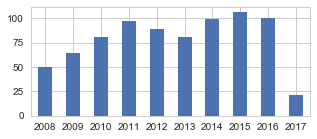

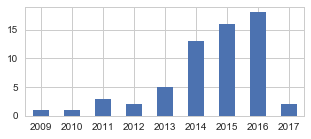

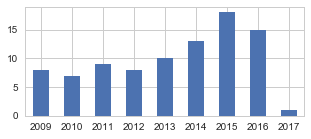

In [27]:
df.query("year >= 2008")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)
# plt_configure(title='豆瓣评分超过2W的电影数量')
plt.figure()
df.query("std >= @std_925")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
# plt_configure(title='标准差STD在92.5%以上的电影分布')
plt.xticks(rotation=0)

plt.figure()
df.query("db_rating <= 5 ")['year'].value_counts().sort_index().plot(kind = 'bar', figsize=(5,2))
plt.xticks(rotation=0)

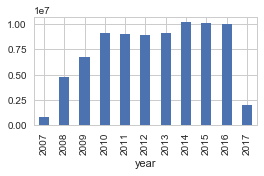

In [50]:
df.query("year >= 2007").groupby('year')['db_ratings_count'].sum().plot(kind='bar')
plt_configure(figsize=(4,2))

In [29]:
for year in range(2008, 2017, 3):
    sub_df = df.query("year >= @year & year<=@year+2")
    print(year, len(sub_df), sub_df['db_ratings_count'].max())
    sub_df['std'].hist(alpha=0.5, figsize=(4,1.8), bins=arange(df['std'].min(), df['std'].max(), 0.1))
    plt.xlim([df['std'].min(),df['std'].max()])
    plt_configure(xlabel='STD', ylabel='Frequency')
    plt.figure()
    sub_df['db_rating'].hist(bins=arange(2, 10, 0.5), alpha=0.5, figsize=(4,1.8))
    plt_configure(xlabel='Rating', ylabel='Frequency')
    align_figures()

2008 195 709045


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACOCAYAAAArQV3KAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD5dJREFUeJzt3XtMVXUAB/Dv5SXJ9RnmRNHUUGxupfhcoiU4dOpIQR53
CYWzcDrFmEPNUNREhs01Jhk2l4G3F0lpGTp8DGfJ9Bam5rNSp1ediKIXRC7x6w/HLRKu54f3nHuI
7+eve8+5j+89Hr+c9zEIIQSIiBTycHcAImpbWBpEJIWlQURSWBpEJIWlQURSWBpEJMXL3QGcsVgs
7o5A1K6FhIQ8MkzXpQE0Hxp4WCgtjXM3vWbTay6A2VpD7Vwt/dHm6gkRSWFpEJEUlgYRSdH9No22
yrznTKvfa4oIdmESItfikgYRSWFpEJEUlgYRSWFpEJEUbgjVoSfZiApwQyqpi0saRCSFpUFEUlga
RCSFpUFEUlgaRCSFpUFEUlgaRCSFpUFEUlgaRCSFpUFEUlgaRCSFpUFEUlgaRCSFpUFEUhSVxty5
c/HDDz/AbrernYeIdE5Rabz55ps4dOgQIiIikJGRgV9//VXtXESkU4ouwjNy5EiMHDkStbW1KC4u
xsKFC2E0GhEdHQ2TyQQfH59m33fr1i3MnDkTW7duhZeXF5YuXQqDwYCgoCCsXLkSHh5cOyJqaxT/
ry0rK8Pq1auxceNGhIaG4p133kFFRQXmzZvX7OvtdjvS09Ph6+sLAMjMzERKSgrMZjOEENi3b59r
fgERaUrRksYrr7yCPn36ICoqqkkRjBo1CtHR0c2+JysrC3FxccjLywMAnDp1CqNGjQIAjB8/HocP
H8akSZNc8RuISEOKSmPbtm3w8/PD008/jdraWly6dAn9+vWDp6cnioqKHnn9jh070L17d4SGhjpK
QwgBg8EAAPDz88O9e/cUBXR253g931XearW67bstlmon4/Q7zZhNnjtyKSqNgwcPoqioCEVFRbh1
6xaSk5Px+uuvIzY2ttnXf/311zAYDPjpp59w+vRppKWlobKy0jG+uroanTt3VhSwrd41PiAgwG3f
HxLS/IWF9T7NmE2Oru8a/+WXX2L79u0AgN69e2PHjh0oKCho8fXbt29HQUEB8vPzMWTIEGRlZWH8
+PEoKysDAJSWlmLEiBGyv4GIdEBRadjt9iZ7SLy9vaW/KC0tDTk5OYiNjYXdbkdERIT0ZxCR+yla
PQkPD0diYiKmTJkCANi7dy8mTpyo6Avy8/Mdj50tnRBR26CoNJYsWYLi4mIcPXoUXl5eSEhIQHh4
uNrZiEiHFN9hbeDAgfD394cQAgBw9OhRjBw5UrVgRKRPikojIyMDBw4cQGBgoGOYwWDAp59+qlow
ItInRaVx+PBhFBcXOw7qIqL2S9Hek8DAQMdqCRG1b4qWNLp06YKpU6di2LBhTXa9ZmZmqhaMiPRJ
UWmEhoYiNDRU7SxE1AYoKo0ZM2bgypUruHDhAsaNG4dr16412ShKRO2Hom0au3fvxrx58/Dee++h
qqoKcXFx+Pbbb9XORkQ6pKg0tmzZgs8++8xxpmtRUZHj7FUial8UrZ54eHjAaDQ6nj/zzDO86paO
mfecaXa41VqFsxXNj2tkimj+DFmiRopKIygoCAUFBaivr8fp06dhNpsRHMyZi6g9UrS4kJ6ejhs3
bqBDhw5Yvnw5jEYjVq5cqXY2ItIhRUsaHTt2RGpqKlJTU9XOQ0Q6p6g0goODHZfqa9SjRw+Ulpaq
EoqI9EtRaZw588/GM7vdjpKSEpSXl6sWSg9a2piohNVahYAAPxemIdIP6V0g3t7emDJlCo4cOaJG
HiLSOUVLGt98843jsRAC58+fb9Ul/4io7VNUGo0XBG7UrVs3bNy4UZVARKRvikqDZ7MSUSNFpTFx
4sRH9p4A/9wAibdYJGo/FJXG9OnT4e3tjZiYGHh5eWHXrl04ceIEFi9erHY+ItIZRaVx6NAh7Nix
w/E8MTERM2fORO/evVULRkT6pHiX648//uh4fODAAfj58TgEovZI0ZLG6tWrkZaWhoqKCgDAgAED
kJWVpWowItInRaUxdOhQfP/996isrESHDh24lEHUjilaPbl69SreeOMNxMXFoaamBgkJCbhy5UqL
r7fb7ViyZAlMJhOio6Oxb98+XLp0CfHx8TCZTFi5ciUaGhpc9iOISDuKT42fM2cOOnbsCH9/f0yb
Ng1paWktvn7nzp3o2rUrzGYzPv74Y6xZswaZmZlISUmB2WyGEIK7aYnaKEWlcfv2bYwbNw7Awzur
xcTEwGaztfj6yZMnY9GiRQAeHsvh6emJU6dOYdSoUQCA8ePHN9mwSkRth6JtGr6+vrh+/brjAK9j
x441uf/JfzVu87DZbFi4cCFSUlKQlZXleL+fnx/u3bunKKDFYmnVuCdltVY94futLkriWo/LZbFU
a5Skue9W79/zSek1mztyKSqNZcuW4a233sLly5cRGRmJqqoqfPDBB07fc+3aNcyfPx8mkwnTp09H
dna2Y1x1dTU6d+6sKGBISEizwy0WS4vjXOFx19J0xmq1IiAgwIVpXENJrpAQ91zGUe1/zyeh12xq
52qpkBSVxq1bt1BYWIiLFy/ir7/+woABA5wuaVRUVCApKQnp6ekYO3YsAOD5559HWVkZRo8ejdLS
UowZM6YVP4OI3E3RNo3s7Gx4e3sjKCgIwcHBTgsDADZv3oy7d+8iNzcXs2fPxuzZs5GSkoKcnBzE
xsbCbrcjIiLCJT+AiLSlaEkjMDAQy5YtwwsvvNDkzvGvvvpqs69fsWIFVqxY8cjwgoKCVsYkIr1w
Who3btxAz5490a1bNwDA8ePHm4xvqTSo7XqSyxwCvG9Ke+C0NJKTk1FUVITMzExs3boVSUlJWuUi
Ip1yuk1DCOF4vGvXLtXDEJH+OS2Nf194598FQkTtl+JT45u7chcRtT9Ot2mcP38eYWFhAB5uFG18
zMv8EbVfTktjz549WuUgojbCaWnwcn5E9F/Sd1gjovaNpUFEUlgaRCSFpUFEUlgaRCSFpUFEUlga
RCSFpUFEUlgaRCSFpUFEUlgaRCSFpUFEUlgaRCSFpUFEUhTdwqCtetIra5O2eCX0toFLGkQk5X+9
pEHaa+3SgtVahYAAPxenITVwSYOIpGi6pNHQ0IBVq1bh7Nmz8PHxwdq1a9GvXz8tIxDRE9K0NEpK
SlBXV4cvvvgC5eXlWL9+PT788EOn72lpcddqrcLZCm7oJNKapqsnFosFoaGhAIAXX3wRJ0+e1PLr
icgFNF3SsNlsMBqNjueenp6or6+Hl1fLMQb7V7cwvAuA5se5m16z6TUX4JpsFovFNWE0/uwn4Y5c
mpaG0WhEdfU/M0ZDQ4PTwggJCdEiFhFJ0HT1ZPjw4SgtLQUAlJeXY9CgQVp+PRG5gEFoeGfnxr0n
586dgxAC69atw8CBA7X6eiJyAU1Lg4jaPh7cRURSWBpEJEW3554cP34cGzZsQH5+fpPh3333HbZt
2wZPT08MGjQIq1atgoeHB2bMmOHYndunTx9kZmZqnu2TTz7BV199he7duwMAMjIy8Oyzz2p6FGxz
2W7evIm3337b8fz06dNITU1FfHy86tPNbrdj+fLluHr1Kurq6jBv3jyEhYU5xu/fvx+bNm2Cl5cX
oqKiEBMTo9mRw4/L5s557XHZ3DqvCR3Ky8sT06ZNE7NmzWoy/P79+yIsLEzU1NQIIYRYvHixKCkp
EbW1tSIyMtKt2YQQIjU1VZw4caLJsD179oi0tDQhhBC//PKLSE5Odku2Rj///LOYPXu2qK+v12S6
FRYWirVr1wohhLh9+7aYMGGCY1xdXZ0IDw8Xd+7cEQ8ePBAzZ84UN2/e1GyaOcvm7nnNWTYh3Duv
6XL1pG/fvsj

2011 267 541444


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACOCAYAAAArQV3KAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEM5JREFUeJzt3X1QFHUDB/DvgQIJvubLqPh2BlLjPKUk4CSgooOlDiqI
3JUwYhYMjmGMoaa8lI/oYDqNIylOTQphFqOpZdiAOBiOjJKY4rsphoiJInq8yBG/5w/GeyTh3EX2
bonv56+73bvbL+v6vX27XY0QQoCISCIbawcgoo6FpUFEsrA0iEgWlgYRycLSICJZWBpEJEsXawcw
p7Cw0NoRiDo1d3f3p4YpWhrbtm3D4cOHYTQaodPp4OHhgeXLl0Oj0cDFxQXx8fGwsTG/stNSaKCp
UFobZ21qzabWXACztYXSuVr70lZs86SgoACnTp3Crl27kJaWhvLyciQlJSE6OhoZGRkQQiAnJ0ep
yRORQhQrjV9//RWurq6IiopCREQEJk6ciOLiYnh4eAAAfHx8cOzYMaUmT0QKUWzzpLKyEmVlZdi6
dStKS0sRGRkJIQQ0Gg0AwNHREQ8fPlRq8kSkEMVKo1evXtBqtbCzs4NWq4W9vT3Ky8tN46urq9Gj
R49nfo65naFq3lH6PNlyf696rmlP+k/PVsf9W+eZ0tSazRq5FCsNd3d37Ny5EwsWLMBff/2F2tpa
jB8/HgUFBfD09EReXh68vLwkfU5L1LpzCmjKdrHCsc3vHzSo7e8FAHd3txaHq32eMZs81toRqlhp
TJo0CSdOnEBQUBCEEIiLi4OzszNWr16NjRs3QqvVwt/fX6nJE5FCFD3k+tFHHz01LD09XclJEoCM
QxdaHF5WVoWLFS2Pe0zv3/JaCtFjPCOUiGRhaRCRLCwNIpKFpUFEsrA0iEgWlgYRycLSICJZWBpE
JAtLg4hkYWkQkSwsDSKShaVBRLKwNIhIFpYGEcnC0iAiWVgaRCSLpNJYtGgRfv75ZxiNRqXzEJHK
SSqN9957D0ePHoW/vz8SExPx+++/K52LiFRK0uX+xo0bh3HjxqGurg5ZWVlYsmQJnJycEBQUBL1e
Dzs7O6VzEpFKSL5GaEFBAfbt24f8/Hz4+PjgrbfeQn5+PiIjI/Hll18qmZGIVERSaUyaNAnOzs4I
DAxEXFwcHBwcAAAeHh4ICgpSNCARqYuk0tixYwccHR3x4osvoq6uDiUlJRg2bBhsbW2xd+9epTMS
kYpI2hF65MgRvPvuuwCAu3fvIiIiArt371Y0GBGpk6TS+O677/DNN98AAAYPHow9e/ZIun/J3bt3
4evri6tXr6KkpAQ6nQ56vR7x8fFobGx8vuREZBWSSsNoNDY7QtK1a1dJ73ly/0dSUhKio6ORkZEB
IQRycnLaGJmIrElSaUyZMgVhYWFIT09Heno6wsPDMXnyZLPvWb9+PUJCQtC/f38AQHFxMTw8PAAA
Pj4+OHbs2HNGJyJrkFQay5Ytw/z583Ht2jX8+eefCA0NxdKlS1t9/Z49e9CnTx94e3ubhgkhoNFo
AACOjo54+PDhc0YnImvQCCGElBdevnwZVVVVePLl48aNa/G1b7/9NjQaDTQaDc6fP4/hw4fj3Llz
OHfuHAAgOzsbx44dQ1xcnNlptnbX6o4g9/cqa0dok0n/6WntCKQiLd2VXtIh18TEROTm5mLIkCGm
YRqNBjt37mzx9Y93mgLA/PnzkZCQgOTkZBQUFMDT0xN5eXnw8vJqc2igqVBaG2dthYWFGDRokLVj
PKWsrOyZudzdrXMDaLX/e6oxm9K5WvvSllQa+fn5yMrKMu3UbIvY2FisXr0aGzduhFarhb+/f5s/
i4isR1JpDBkyBBK3Yp6SlpZmeizlMC0RqZuk0ujZsyemT5+OMWPGNDv0mpSUpFgwIlInSaXh7e3d
7EgIEXVekkpj9uzZKC0txZUrVzBhwgTcunWr2U5RIuo8JJ2ncfDgQURGRuK///0vqqqqEBISgn37
9imdjYhUSFJpbN++Hbt27TL90nXv3r1ITU1VOhsRqZCk0rCxsYGTk5Ppef/+/WFjw2sSE3VGkvZp
uLi4ID09HQ0NDTh//jwyMjLg5madk4CIyLokrS7ExcXh9u3bsLe3x8qVK+Hk5IT4+HilsxGRCkla
0+jWrRtiYmIQExOjdB4iUjlJpeHm5mb6hepj/fr1Q15eniKhiEi9JJXGhQsXTI+NRiOys7NRVFSk
WCgiUi/Zh0C6du2KN998E8ePH1ciDxGpnKQ1jR9++MH0WAiBy5cvS7rkHxH9+0gqjYKCgmbPe/fu
jU2bNikSiDq2jEMXnv2iFpSVVUGFl6ygFkgqDf6alYgek1QakydPfuroCfD/637yyuJEnYek0pg5
cya6du2K4OBgdOnSBQcOHMCZM2fMXlyYOqa2bl5Q5yGpNI4ePYo9e/aYnoeFhWHOnDkYPHiwYsGI
SJ0kH3J98j4lubm5cHR0VCQQEambpDWNTz75BLGxsaioqAAAaLVarF+/XtFgRKROkkpj9OjR+Omn
n3Dv3j3Y29tzLYOoE5O0eXLz5k0sWLAAISEhqKmpQWhoKEpLS5XORkQqJPmn8QsXLkS3bt3Qt29f
zJgxA7GxsUpnIyIVklQalZWVmDBhAoCmO6sFBwfDYDC0+nqj0Yhly5ZBr9cjKCgIOTk5KCkpgU6n
g16vR3x8PBobG9vnLyAii5K0T8PBwQHl5eWmE7xOnjzZ7P4n/7R//3706tULycnJuH//PmbNmgU3
NzdER0fD09MTcXFxyMnJwdSpU9vnryAii5FUGitWrMD777+PGzduICAgAFVVVfj8889bff20adNM
t10UQsDW1hbFxcXw8PAAAPj4+CA/P5+lQdQBSSqNu3fvIjMzE9evX8fff/8NrVZrdk3j8dEVg8GA
JUuWIDo6GuvXrzetqTg6OuLhw4ftEJ+ILE1SaSQnJ2PixIlwcXGR/MG3bt1CVFQU9Ho9Zs6cieTk
ZNO46upq9OjRQ9LntHbn6meNs7aysjJrR2iRWnMB6v73VGs2a+SSfAPoFStW4NVXX2125/hZs2a1
+PqKigqEh4cjLi4O48ePBwC88sorKCgogKenJ/Ly8uDl5SUpoHsrv5cuLCxsdVx7eJ7fYJSVlWHQ
oEHtmKZ9qDUX0JRNyX/P56H0stZWSudqrZDMlsbt27cxYMAA9O7dGwBw+vTpZuNbK42tW7fiwYMH
SElJQUpKCgDg448/xpo1a7Bx40ZotVrTPg8i6ljMlkZERAT27t2LpKQkfPXVVwgPD5f0oatWrcKq
VaueGp6ent62lESkGmbP0xBCmB4fOHBA8TBEpH5mS+PJC+88WSBE1HlJ/ml8S1fuIqLOx+w+jcuX
L8PPzw9A007Rx495mT+izstsaRw6dMhSOYiogzBbGrycHxH9k+w7rBFR58bSICJZWBpEJAtLg4hk
YWkQkSwsDSKShaVBRLKwNIhIFpYGEcnC0iAiWVgaRCQLS4OIZGFpEJEskq5GTmQJz3MFeADQ+7u1
UxIyh2saRCTLv3pN43m/uYjoaf/q0qDO5Xm+JLhpIx03T4hIFouuaTQ2NiIhIQEXL16EnZ0d1qxZ
g2HDhlkyAlGLzK2llJVV4WJF6+M721qKRUsjOzsb9fX12L17N4qKirBu3Tp88cUXloxA1O4621Ef
i26eFBYWwtvbGwDw2muv4ezZs5acPBG1A4uuaRgMBjg5OZme29raoqGhAV26tB6jtTtXP2scAIzq
Kz9jexjVtyeAautM3Ay15gI6d7ZnLcdKvbetLFoaTk5OqK7+/8xvbGw0Wxju7u6WiEVEMlh082Ts
2LHIy8sDABQVFcHV1dWSkyeidqARFryz8+OjJ5cuXYIQAmvXrsXIkSMtNXkiagcWLQ0i6vh4chcR
ycLSICJZVPv

2014 305 456853


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQ0AAACRCAYAAADZwe2EAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAENVJREFUeJzt3WtQVHUDBvBnuSd4DXNUsERBapwpRVEnwQs4aOqggNwm
oXAsGBzDGANNuaSJDqY1jqRYTgatZSSp5aCDl4EwGd3ElLyWl3CFEUF0AWWJ//vBcYtXWM5Bz+4i
z+/T7jnsnsfj4eHcj0oIIUBEJJGVuQMQUdfC0iAiWVgaRCQLS4OIZGFpEJEsLA0iksVGyS/funUr
Dh8+DL1ej4iICHh7eyM5ORkqlQru7u5ITU2FlRV7i6grUew3trS0FKdOncLOnTuRk5ODyspKZGRk
ICEhAWq1GkIIHDp0SKnJE5FCFCuNX375BR4eHoiPj0dsbCwmT56M8vJyeHt7AwB8fX1x7NgxpSZP
RApRbPOktrYWWq0WW7ZsQUVFBeLi4iCEgEqlAgA4Ojri3r17Rr9Do9EoFY+IJPDy8npsmGKl0adP
H7i5ucHOzg5ubm6wt7dHZWWlYXx9fT169erV4fe0FRp4WCjtjTM3S81mqbkAZusMpXO190dbsc0T
Ly8vFBcXQwiBqqoqNDY2YsKECSgtLQUAFBUVYcyYMUpNnogUotiaxpQpU3DixAmEhIRACIGUlBS4
uLhg5cqV2LBhA9zc3BAQEKDU5IlIIYoecv3ggw8eG5abm6vkJIlIYYqWBpmH+sD5NodrtXW4UN32
uEciAzyViETPEJ5ZRUSysDSISBaWBhHJwtIgIlm4I9QCtbcjk8gScE2DiGRhaRCRLCwNIpKFpUFE
srA0iEgWlgYRycLSICJZWBpEJAtLg4hkYWkQkSwsDSKShaVBRLKwNIhIFpYGEcnC0iAiWSTdT2Ph
woUICgqCv78/bG1tlc70TOA9MehZJWlN45133kFxcTECAgKQnp6O33//XelcRGShJK1pjB07FmPH
jsX9+/dRUFCAxYsXw8nJCSEhIYiMjISdnZ3SOYnIQki+3V9paSn27NmDkpIS+Pr64o033kBJSQni
4uLw5ZdfKpmRiCyIpNKYMmUKXFxcEBwcjJSUFDg4OAAAvL29ERIS0u7nbt++jaCgIGzfvh02NjZI
Tk6GSqWCu7s7UlNTYWXF/bBEXY2k39odO3bg008/xZw5cwAA165dAwBYW1sjPz+/zc/o9fpWBZOR
kYGEhASo1WoIIXDo0KGnkZ+ITEzSmsbRo0eRn5+P/Px83L59G7GxsXjrrbcQFhbW7mfWrVuH8PBw
ZGdnAwDKy8vh7e0NAPD19UVJSQmmTZvW4bTbe9x9R+PMTavVmjtCmzrKpdHUmyhJW9O23P9PS81m
jlySSmPXrl3YtWsXAGDw4MHYvXs3QkND2y2N3bt3o1+/fvDx8TGUhhACKpUKAODo6Ih79+5JCujl
5dXmcI1G0+44c9NoNBg0aJC5YzxGq9V2mMvLyzzPcrX0/09LzKZ0rvYKSVJp6PX6VkdIOjpX44cf
foBKpcKvv/6Kc+fOISkpCTU1NYbx9fX16NWrl5RJk4k96fklfID0s09Safj7+yM6OhozZswAABw8
eBBTp05t9+e/+eYbw+v58+cjLS0NmZmZKC0txbhx41BUVITx48c/YXQiMgdJO0KXLl2K+fPn48qV
K/j7778RFRWFJUuWyJpQUlISNm3ahLCwMOj1egQEBHQqMBGZl+TzNIYNGwZnZ2cIIQAAJ06cwNix
Yzv8XE5OjuF1bm5uJyJSV9LZzRuttg4WuNuA2iCpNNLT03HkyBG4uroahqlUKnz99deKBSMiyySp
NEpKSlBQUGA454KIui9J+zRcXV0NmyVE1L1JWtPo3bs3Zs6ciVGjRrU69JqRkaFYMCKyTJJKw8fH
Bz4+PkpnIaIuQFJpzJ07FxUVFbh8+TImTpyImzdvttopSkTdh6R9Gvv370dcXBw+/vhj1NXVITw8
HHv27FE6GxFZIEmlsW3bNuzcuROOjo54/vnnkZ+fb7imhIi6F0mlYWVlBScnJ8P7F154gffCIOqm
JO3TcHd3R25uLpqbm3Hu3Dmo1Wp4evLCJKLuSNLqQkpKCqqqqmBvb4/ly5fDyckJqampSmcjIgsk
aU2jR48eSExMRGJiotJ5iMjCSSoNT09Pww10Hunfvz+KiooUCUVElktSaZw//++Vi3q9HoWFhSgr
K1MsFBFZLtmHQGxtbTFjxgwcP35ciTxEZOEkrWn8+OOPhtdCCFy6dImPZyTqpiSVRmlpaav3ffv2
xcaNGxUJRESWTVJp8GpWInpEUmlMnTr1saMnwL+PJeCDj4i6D0mlMXv2bNja2iI0NBQ2NjbYt28f
zpw5I/vmwkTU9UkqjeLiYuzevdvwPjo6GkFBQRg8eLBiwYjIMkk+5Hrs2DHD6yNHjsDR0VGRQERk
2SStaXz00UdISkpCdXU1AMDNzQ3r1q1TNBgRWSZJpTFy5Ej8/PPPqKmpgb29PdcyiLoxSZsnN27c
wNtvv43w8HA0NDQgKioKFRUVSmcjIgskaU0jJSUFCxYswPr16+Hs7IxZs2YhKSmp1TNb/0uv12P5
8uW4ceMGmpqaEBcXh+HDhyM5ORkqlQru7u5ITU3ljXyoFT58umuQ9FtbW1uLiRMnAnj4ZLXQ0FDo
dLp2f37v3r3o06cP1Go1vvjiC6xatQoZGRlISEiAWq2GEILndhB1UZLWNBwcHFBZWWk4wevkyZOt
nn/y/6ZPn254wLMQAtbW1igvL4e3tzcAwNfXFyUlJZg2bVqH09ZoNJ0aZ25ardbcEdpkqbmAJ8+m
0dQ/pSRtfbdlLmvmyCWpNJYtW4Z3330X169fR2BgIOrq6vDZZ5+1+/OPdpTqdDosXrwYCQkJWLdu
naF0HB0dce/ePUkBvdp5KrBGo2l3nLlpNBoMGjTI3DEeo9VqLTIX8HSyeXkps3liqcua0rnaKyRJ
pXH79m3k5eXh6tWr+Oeff+Dm5mZ0TQMAbt68ifj4eERGRmL27NnIzMw0jKuvr0evXr1kxCciSyFp
n0ZmZiZsbW3h7u4OT0/PDgujuroaMTExWLp0KUJCQgAAr7zyiuFq2aKiIowZM+YJoxOROUha03B1
dcWyZcvw6quvtnpy/Jw5c9r8+S1btuDu3bvIyspCVlYWAODDDz/E6tWrsWHDBri5uRn2eRBR12K0
NKqqqjBgwAD07dsXAHD69OlW49srjRUrVmDFihWPDc/Nze1sTiKyEEZLIzY2Fvn5+cjIyMD27dsR
ExNjqlxEZKGM7tMQQhhe79u3T/EwRGT5jJbGf2+8898CIaLuS/J53G3duYuIuh+j+zQuXboEPz8/
AA93ij56zdv8EXVfRkvjwIEDpspBRF2E0dLozrfze5IrLrXaOgwaxHuOmNqT/J/xClnpeG06EcnC
0iAiWSSdRk70rDO2aaPV1uFCdfvju9umDdc0iEgWlgYRycLSICJZWBpEJAtLg4hk4dEToifU3R69
wDUNIpKFpUFEsrA0iEgWlgYRycLSICJZWBpEJIvFH3Jt73BWRxcRAV3vUBZRV8A1DSKSxaRrGi0t
LUhLS8OFCxdgZ2eH1atX48UXX1Rsek960g2RKXR2OdVq62CO51KbtDQKCwvR1NSE7777DmVlZVi7
di0+//xzU0YgeqaY42xUk26eaDQa+Pj4AABee+01nD171pSTJ6KnwKRrGjqdDk5OTob31tbWaG5u
ho1N+zFGONe3M7w3gLbHmZulZrPUXACzdcbTyKXRaGR/xqSl4eTkhPr6f/+RLS0tRgvDyxwbbERk
lEk3T0aPHo2ioiIAQFlZGTw8PEw5eSJ6ClTChA9pfXT05OLFixBCYM2aNRg2bJipJk9ET4FJS4OI
uj6e3EVEsrA

# 4. Cluster analysis

In [30]:
from sklearn.cluster import KMeans
X = df[['1_star','2_star','3_star','4_star','5_star']].as_matrix()

n_clusters = 6
kmeans_model = KMeans(n_clusters=n_clusters, random_state=1).fit(X)

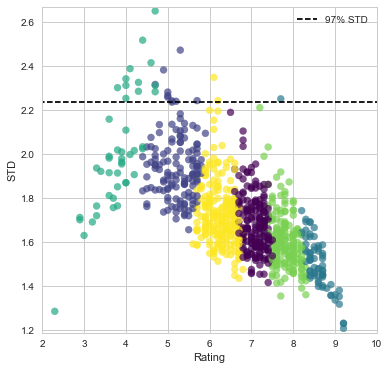

In [51]:
df['cluster'] = kmeans_model.labels_
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, '.\clusters.html', show_ratings_num=False, click=True, show_distribution=True)

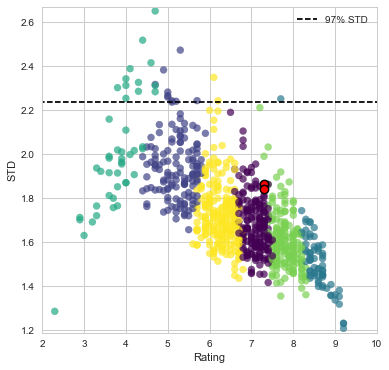

In [32]:
df['cluster'] = kmeans_model.labels_
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
sub_df = df[df['name'].str.contains("神奇女侠|暮光之城 Twilight")] 
ax.scatter(sub_df.db_rating, sub_df['std'], label='',
           s=70, edgecolor='black',facecolor='red', lw=1.5) 
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)

### 3.3.1 Cross validation of the number of clustering

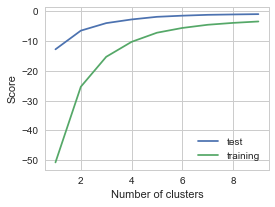

In [33]:
from sklearn.model_selection import GridSearchCV

cluster_range = arange(1,10)
grid = GridSearchCV(KMeans(random_state=1), {'n_clusters': cluster_range}, cv=5, n_jobs=-1) 
grid.fit(X)

plt.plot(cluster_range, grid.cv_results_['mean_test_score'], label='test')
plt.plot(cluster_range, grid.cv_results_['mean_train_score'], label='training')
plt_configure(figsize=(4,3), xlabel='Number of clusters', ylabel='Score', legend=True)

### 3.3.2 Cluster centroids

In [34]:
def prettyfloat(float):
    return "%0.1f" % float

In [35]:
def std_for_distribution(distribution, average):
    std = (distribution[0]*(2-average)**2+distribution[1]*(4-average)**2+distribution[2]*(6-average)**2+\
            distribution[3]*(8-average)**2+distribution[4]*(10-average)**2)**0.5
    return std

In [36]:
vmin, vmax = df['cluster'].min(), df['cluster'].max()
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
cmap = mpl.cm.get_cmap('viridis')
colors = cmap(norm(arange(vmin, vmax+1)))

In [37]:
x=arange(1,6) # 5 rating types
cluster_rating, cluster_std = [], []
for cluster, color in zip(kmeans_model.cluster_centers_, colors):
    plt.figure()
    rating_avg=np.dot(cluster, arange(2,12,2))
    std = std_for_distribution(cluster, rating_avg)
    plt.bar(x, cluster, alpha=0.7, color=color)
    plt.ylim([0,0.5*1.1])
    cluster_rating.append(rating_avg)
    cluster_std.append(std)
    plt_configure(title='Rating: '+prettyfloat(rating_avg)+', '+prettyfloat(std), figsize=(3.5,2.5))
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOYAAAC4CAYAAAD37pA8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAD91JREFUeJzt3X9MlHUcB/A3cJ3ioaETW63pFMWWPybo3JwamoIOAlFo
h9IdTZvUZpqaim7iGYYwtVrya2qGMh2UMYYOM39cunSawiAFlaZGaE5AJThOPI97+oN5qSh38Nxx
X7n36y+5e368hb15nju+fPCQJEkCEQnF09UBiKg9FpNIQCwmkYBYTCIBsZhEAmIxiQSkcHWAl8m7
776LW7duPfVYnz598NZbb2H16tUIDAy06zjNzc0oLi7G+++/DwBITEyE0WjEt99+6/DMz9JoNPj9
99/bPf7mm2/i+PHjHe77999/IzIyEqdPn4ZKper0ue3ZX06+HkUiu02fPl3Kzs6WamtrpdraWunO
nTtSeXm5FB8fL02cOFFqamqy6zjbt2+X5s6da/24sbFR+vfff50V+yn379+35q+trZUqKiqkcePG
Sbm5uR3uV1NTI4WGhkoBAQGSwWDo9Hnt3b+r+Xoa3sp2kkqlgp+fH/z8/DBo0CCMHTsWqampaGho
wLlz5+w6hvTMmo6+ffuiX79+zojbjq+vrzW/n58f0tPTERgYiA8++OCF+xw8eBDR0dHw9vbu0jk7
s39X8vVELKYDKJVKAICXlxcAwGg0QqfTYcqUKRg1ahSCg4ORnZ0NACgoKEB6ejoqKiowcuRI3Lx5
E4mJiVi6dKn1+Xnz5mHnzp2YPHkyxo0bh5UrV8JoNFrPV1xcjFmzZmHs2LFISEjApk2bkJiYCAC4
efMmRo4ciYKCApu5L1y4gJMnT2LdunUdbqfX67Fq1SqsXbu2858cGfvbm68n4mtMme7du4cvv/wS
fn5+mDBhAgBg8+bNuHjxIjIzM9G/f38cOXIEW7ZswTvvvIOwsDD8+eefOHPmDHbt2oUBAwa0O2ZV
VRVee+017NmzB7du3cLSpUsxZswYfPjhhygtLcWqVauwevVqTJ06FYWFhdixYweioqIAAK+//jp+
++039O3b12b2rKwszJ49G8OHD+9wu6+++goA7L4jcNT+9ubriVjMTkpNTcW2bdsAABaLBa2trZgw
YQK+//57+Pj4AACCgoIQGxuLUaNGAQA++ugjZGRkoKqqCm+//Tb69OkDLy8v+Pn5Pfccjx49QnJy
MgYOHIjhw4dj6tSpuHjxIgBg3759mD59OuLj4wEAK1aswNmzZ637dnTcJ1VXV+P06dM4cOBA1z8Z
TiR6PmdjMTspISEBkZGRMJlM2L9/P44ePYolS5ZgxIgR1m2ioqKg1+tRVFSEGzdu4PLlyzAajbBY
LHadQ6VSYeDAgdaPfXx8rLeyV69eRURExFPbjxs3Do2NjZ36fxw+fBj+/v4YPXp0p/brLqLncza+
xuyk/v37Y8iQIRgxYgQ2bNiA8ePH45NPPsHt27et26xbtw46nQ69evXCnDlzkJeX16k3d1555ZUX
PqdQKOwueEdOnjyJkJAQ2cdxFtHzORuLKdOGDRvg5eUFnU4HALh//z4KCgqQlpaGFStWIDw8HEql
Ek1NTdZ3Yz08PLp8vhEjRqCiouKpxx7f5trLbDbj0qVLmDhxYpdzOJPo+boDiynTgAEDsHLlSvz6
6684duwYfHx8oFKpcPToUdTU1KCkpASffvopJEmCyWQC0LYoob6+HjU1NTCbzZ06n1arhV6vx969
e/HXX38hPT0dpaWl1rK3trairq4OLS0tLzzGjRs3YDKZnvumij37y9nenv07yucuWEwHiImJQWBg
IFJSUmA2m7Ft2zacOXMG4eHhWLNmDSZPnozg4GDrlW7WrFlQqVQICwtDZWVlp841ZswYpKSkICcn
BxEREaisrMSMGTOst7+3b9/GlClTUFxc/MJj1NfXA2j7meGz7Nlfzvb27N9RPnfhIT37024S2h9/
/AGVSgV/f3/rY4sXL8bYsWOxZMkSl2TatWsX3njjDYSFhbnk/D0Rr5gvmbKyMixatAjnz5/HrVu3
kJ+fj7NnzyI0NNQleQwGA4qLizFp0iSXnL+n4hXzJWM2m7F161YcOnQIjY2N8Pf3x7JlyzBt2jSX
ZTKZTNbVT+QYLCaRgHgrSyQgFpNIQCwmkYC6fa1sSUlJd5+SSGjjx49v95hLFrE/L4ijlJSUOPX4
XcFM9nHHTC+6UPFWlkhALCaRgFhMIgGxmEQCYjGJBMRiEgmIxSQSkM2fY1osFuh0Oly9ehVKpRKb
Nm3CkCFDrM/n5OTgxx9/tI5h3LhxI4YNG+a8xERuwGYxjx07BpPJhPz8fJSVlSE1NRVZWVnW5y9d
uoS0tDS3nWZG5Aw2i1lSUoKpU6cCaBuTeOnSpaeer6iowI4dO1BXV4dp06YhISHBOUmJ3IjNYhoM
BusgY6BtoLDZbIZC0bZreHg4FixYAB8fHyxZsgR6vR7Tp0/v8JjOXi8r4npcZrIPM7WxWUwfHx80
NzdbP7ZYLNZSSpKE+Ph46zj+4OBgVFZW2iwm18q6HjPZR9i1skFBQTh16hSAtnkzAQEB1ucMBgPe
e+89NDc3Q5IknDt3jq81iRzA5hUzJCQEp0+fRmxsLCRJQkpKCg4ePAij0Qi1Wo3ly5dDq9VCqVRi
0qRJCA4O7o7cRD2azWJ6enriiy++eOqxJ0cnRkVFWf/SFBE5BhcYEAmIxSQSEItJJCAWk0hALCaR
gFhMIgGxmEQCYjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBMRiEgnIZjEtFguS
kpKgVquh0WhQXV393O3Wr1+PrVu3OjwgkTuyWcwnBz6vXLkSqamp7bbJy8tDVVWVUwISuSPZA59L
S0tRXl4OtVqN69evOyclPdf6yPbfJO3V0NCAQt+jXdo3uSixy+cl+8ga+FxbW4uMjAykp6fj8OHD
dp+UA58do6GhwSX7O/Pz6y5fO1tkDXz++eefcf/+fSxevBh1dXVoaWnBsGHDMG/evA6PyYHPjtHV
Kx7QVkpfX98u7eusz687fe2ePP7z2CxmUFAQ9Ho9wsLC2g181mq10Gq1AICCggJcv37dZimJyDbZ
A5+JnsTXvY4he+DzY7xSEjkOFxgQCYjFJBIQi0kkIBaTSEAsJpGAWEwiAbGYRAJiMYkExGISCYjF
JBIQi0kkIBaTSEAsJpGAWEwiAbGYRAJiMYkEJHuu7JEjRxAdHY2YmBjs2bPHaUGJ3ImsubKtra3Y
tm0bcnJykJ+fj/379+PevXtODUzkDmTNlfXy8kJxcTEUCgXu3r0Li8UCpVLpvLREbsLmFfNFc2Uf
UygU+OWXXzBnzhxMnDgR3t7ezklK5EZkzZV9LDQ0FDNnzkRiYiIKCwsRHR3d4TE58NkxRBz4LGIm
uYQc+NzRXFmDwYCPP/4Yu3fvhlKphLe3Nzw9bb/Ry4HPjiHiwGcRM8kh7MBnW3NlIyIiEBcXB4VC
gZEjRyIyMtLh4Yncjey5smq1moOfiRyMCwyIBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQC
YjGJBMRiEgmIxSQSEItJJCAWk0hALCaRgFhMIgGxmEQCYjGJBGRzgoHFYoFOp8PVq1ehVCqxadMm
DBkyxPr8oUOHsGfPHnh5eSEgIAA6nc6uuT9E9GKyBj63tLTgm2++wd69e5GXlweDwQC9Xu/UwETu
wGYxOxr4rFQqkZeXZ50lazab0atXLydFJXIfNm9lXzTwWaFQwNPTEwMHDgQA5Obmwmg0YvLkyTZP
yrmyjiHiDFcRM8kl5FxZWwOfLRYLtmzZghs3bmD79u3w8PCweVLOlXUMEWe4iphJDlfNlbV5KxsU
FIRTp04BQLu

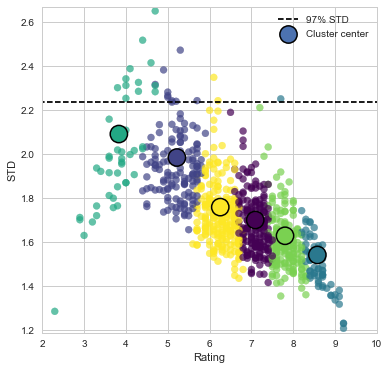

In [38]:
df['cluster'] = kmeans_model.labels_
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
ax.scatter(cluster_rating, cluster_std, c=arange(0,6), label='Cluster center',
           s=300, cmap='viridis', edgecolor='black', lw = 1.5)
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)

In [39]:
target_ids = [3,5]

5.04340824916 2.28053500032


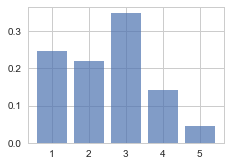

In [40]:
mix_dis = (kmeans_model.cluster_centers_[target_ids[0]] + kmeans_model.cluster_centers_[target_ids[1]])*0.5
rating_avg=np.dot(mix_dis, arange(2,12,2))
std = std_for_distribution(mix_dis, rating_avg)
print(rating_avg, std)
plt.bar(x, mix_dis, alpha=0.7)
plt_configure(figsize=(3.5,2.5))

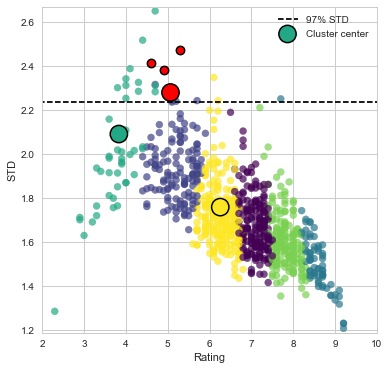

In [41]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df['db_rating'], df['std'], c=df['cluster'], alpha=0.7, cmap='viridis', label='')
ax.scatter([cluster_rating[i] for i in target_ids] , [cluster_std[i] for i in target_ids], 
           color=[colors[i] for i in target_ids], 
            label='Cluster center',
           s=300, edgecolor='black', lw = 1.5)
ax.scatter(rating_avg, std, 
           s=300, facecolor='red', edgecolor='black', lw = 1.5)
sub_df = df[df['name'].str.contains("小团圆|小时代4|长城")] 
ax.scatter(sub_df.db_rating, sub_df['std'], label='',
           s=70, edgecolor='black',facecolor='red', lw=1.5) 
plt.plot([0,10],[std_standard, std_standard], linestyle='--', color='black', label='97% STD')
ax.axis([2,10,df['std'].min()-0.02,df['std'].max()+0.02])
plt_configure(xlabel='Rating', ylabel='STD', figsize=(6,6), legend=True)

In [42]:
for cluster in arange(0, n_clusters):
    display(movie_list(df.query('cluster == @cluster').sort_values(by='std',ascending=False), len=8))

In [43]:
movie_list2(df[df['name'].str.contains("万万没想到|大鱼海棠|夏洛特烦恼|爱乐之城|\
                                       |女巫季节|消失的子弹|竊聽風雲|萨利机长")].sort_values(by='db_rating',ascending=True)) 
# 魔兽|小王子; 明日边缘|国王的演讲
# movie_list2(df[df['name'].str.contains("小团圆|小时代4|长城")])

## 3.4 Misc analysis

In [44]:
# sub_df = df[df['name'].str.contains("西游")]
# movie_list(sub_df.sort_values(by='std',ascending=False))

In [45]:
df[df['name'].str.contains("大话天仙")]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,mode,std,std2,cluster
1378,0.661,0.231,0.081,0.012,0.015,,https://img3.doubanio.com/view/movie_poster_co...,3.0,23184,大话天仙,https://movie.douban.com/subject/4913222/,2014,2,1.629724,1.900526,3


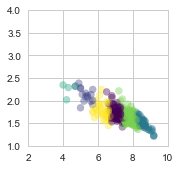

In [46]:
sub_df = df.query("db_ratings_count > 100000")
fig, ax = plt.subplots()
scatter_plot = ax.scatter(sub_df['db_rating'], sub_df['std'], c=sub_df['cluster'], alpha=0.4, cmap='viridis')
ax.axis([2,10,1,4])
plt_configure(figsize=(2.5,2.5))
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'D:\movie_output\clusters2.html', show_ratings_num=False, click=True)